<h3 >   
      <font size="6" color = Black >
            <span style='font-family:Georgia'>
            EXPLORATORY DATA ANALYSIS
            </span>   
        </font><br> 
        <font size="" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            PREDICTIVE MAINTENANCE FOR CAR RENTAL COMPANY
            </span>   
        </font>
</h3>

<div>
<img src="https://www.garrettmotion.com/wp-content/uploads/2018/06/Connected_Automotive_Software-e1531110603583-1125x363-1532534382.png" width="1200", height="100"/>
</div>

<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            Table of Contents:<br>
            </span>   
        </font>    
</h2>
<span style='font-family:Georgia'>
    <ol>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#Jupyter'>Getting Jupyter Notebook Ready</a></li>
        <li><a href='#data'>Reading & Understanding the data</a></li>
        <li><a href='#clean'>Data Cleaning & Manipulation</a></li>
        <li><a href='#outliers'>Treating the Outliers: dataframe: usage_data_groups</a></li>
        <li><a href='#analysis'>Data Analysis: usage_data_groups</a></li>
        <li><a href='#columns'>Analyze & Delete Unnecessary Columns - maintenance_part_consumption</a></li>
        <li><a href='#parts'>Data Analysis: maintenance_part_consumption</a></li>
        <li><a href='#merge'>Merging: usage_data and maintenance_part_consumption</a></li>
        <li><a href='#relation'>Find relation between variables : Merged_data_new</a></li>
        <li><a href='#bins'>Merging the Predicted variable - Failure_bin</a></li>
        <li><a href='#predictive'>Data Analysis with Predictive_maintenance_df dataframe</a></li>
        <li><a href='#conclusion'>Conclusions</a></li>
    </ol>
</span>

<a id="intro"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<h2>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.1 Objective:
            </span>   
        </font>    
</h2>

<h3 >   
      <font size="3" color = black >
            <span style='font-weight: normal'>
                <span style='font-family:Georgia'>
               This is a case to illustrate not just EDA but also to build predictive models from end-to-end, and make a direct impact on the clients bottom line
            </span>   
        </font>    
</h3>

<h2>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.2 Business Understanding:
            </span>   
        </font>    
</h2>

<h3 >   
      <font size="3" color = black >
            <span style='font-weight: normal'>
                <span style='font-family:Georgia'>
               This Exploratory Data Analysis is of a Car Rental Company for Predictive Maintenance<br>
             <br>The client is the director of a car rental company. Among other tasks, he manages the car fleet and deals with the scheduled maintenance events, but also with the unexpected problems, that can prove very costly because of the associated repairs and unavailability<br>
              <br>To prevent these issues, you may advise to use a data-driven approach, since they already have some historical information about past failures, as well as data about car usage and maintenance <br>
             <b><br>More specifically, we intend to answer the folowing questions:</b> <br>
             <br>1. What are the causes of the failures?
        <br>2. Can we anticipate what failures may happen in the next 3 months?
        <br>3. Which actions can we take to prevent these failures?<br>
         </span>   
        </font>    
</h3>

<h2>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            1.3 Supporting data:
            </span>   
        </font>    
</h2>

<h3 >   
      <font size="3" color = black >
            <span style='font-weight: normal'>
                <span style='font-family:Georgia'>
               The Analysis is supported by the 3 available datasets:<br>
             <b><br>1. usage_data.csv:</b> <br>
             <br>Information about how the cars have beed used in the past, as measured by a number of miles collected at certain points in time<br>
             <b><br>2. maintenance_failure.csv:</b> <br>
             <br>Indicates whether or not a part had a failure (not always available)<br>
              <b><br>3. maintenance_part_consumption.csv:</b> <br>
             <br>Stores which parts were serviced, by asset, and the reason<br>
          <br>All the cars are identified by an "Asset number", which is available in each of the dataset files <br>
            </span>   
        </font>    
</h3>

<a id="Jupyter"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Notebook Ready:
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.1 Import Python Libraries:
            </span>   
        </font>    
</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.2 Supress Warnings:
            </span>   
        </font>    
</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            2.3 Adjust Jupyer Views:
            </span>   
        </font>    
</h3>

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="data"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            3. Reading and Understanding the data
            </span>   
        </font>    
</h2>

<a id="input"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            3.1 Importing the input files
            </span>   
        </font>    
</h3>

In [4]:
# Reading all the 3 datasets csv files in python
usage_data = pd.read_csv('usage_data.csv')
maintenance_failure = pd.read_csv('maintenance_failure.csv')
maintenance_part_consumption = pd.read_csv('maintenance_part_consumption.csv')

In [5]:
from IPython.display import display #Netali

In [7]:
print("Usage data")
display(usage_data.head())
print("Maint data")
display(maintenance_failure.head())
display(maintenance_part_consumption.head())


Usage data


,Asset,Time,Use
0,A403193,5,31194.652034
1,A403193,17,31223.536355
2,A403193,56,31362.706261
3,A403193,124,31701.440562
4,A403193,144,31724.489666


Maint data


,Asset,failure_bin
0,A003146,0.0
1,A046288,0.0
2,A082667,NaN
3,A115725,1.0
4,A148200,NaN


,Asset,Time,Reason,Part,Quantity
0,A311482,0,R417,P361646,1
1,A174613,0,R707,P991287,1
2,A174613,0,R707,P169319,1
3,A060723,0,R193,P184448,0
4,A174613,0,R707,P097048,1


In [318]:
maintenance_failure.head()

,Asset,failure_bin
0,A003146,0.0
1,A046288,0.0
2,A082667,NaN
3,A115725,1.0
4,A148200,NaN


In [319]:
maintenance_part_consumption.head()

,Asset,Time,Reason,Part,Quantity
0,A311482,0,R417,P361646,1
1,A174613,0,R707,P991287,1
2,A174613,0,R707,P169319,1
3,A060723,0,R193,P184448,0
4,A174613,0,R707,P097048,1


<a id="inspect"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            3.2 Inspect Data Frames
            </span>   
        </font>    
</h3>

In [320]:
# Database dimension
print("Database dimension - usage_data                          :",usage_data.shape)
print("Database dimension - maintenance_failure                 :",maintenance_failure.shape)
print("Database dimension - maintenance_part_consumption        :",maintenance_part_consumption.shape)

#Database size
print("\nDatabase size - usage_data                               :",usage_data.size)
print("Database size - maintenance_failure                      :",maintenance_failure.size)
print("Database size - maintenance_part_consumption             :",maintenance_part_consumption.size)

Database dimension - usage_data                          : (22828, 3)
Database dimension - maintenance_failure                 : (1819, 2)
Database dimension - maintenance_part_consumption        : (270830, 5)

Database size - usage_data                               : 68484
Database size - maintenance_failure                      : 3638
Database size - maintenance_part_consumption             : 1354150


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Because of multiple records of the data points, the number of rows differ in all the 3 datasets
    </span>    
</div>

In [9]:
# Database columns types
usage_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22828 entries, 0 to 22827
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Asset   22828 non-null  object 
 1   Time    22828 non-null  int64  
 2   Use     22828 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 535.2+ KB


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>In usage_data dataset all columns data types are according to the data, there is no need to change
    </span>    
</div>

In [322]:
usage_data.isnull().sum()

Asset    0
Time     0
Use      0
dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>No missing values in usage_data dataset
    </span>    
</div>

In [323]:
# Database columns types
maintenance_failure.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Asset        1819 non-null   object 
 1   failure_bin  1624 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.5+ KB


In [324]:
maintenance_failure.isnull().sum()

Asset            0
failure_bin    195
dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>In maintenance_failure dataset the failure_bin column which is the predictor has 195 missing values
    </span>    
</div

In [325]:
# Database columns types
maintenance_part_consumption.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270830 entries, 0 to 270829
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Asset     270830 non-null  object
 1   Time      270830 non-null  int64 
 2   Reason    270830 non-null  object
 3   Part      270830 non-null  object
 4   Quantity  270830 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 10.3+ MB


In [326]:
maintenance_part_consumption.isnull().sum()

Asset       0
Time        0
Reason      0
Part        0
Quantity    0
dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>No missing values in maintenance_part_consumption dataset
    </span>    
</div>

In [327]:
# Checking the numeric variables of the dataframes
usage_data.describe(include="all")

,Asset,Time,Use
count,22828,22828.000000,22828.000000
unique,1894,NaN,NaN
top,A344737,NaN,NaN
freq,47,NaN,NaN
mean,NaN,374.998730,30273.978469
std,NaN,211.670945,2528.890997
min,NaN,0.000000,25740.475447
25%,NaN,194.000000,28471.064870
50%,NaN,377.000000,30516.599911
75%,NaN,562.000000,31878.612314


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>For 'Use' column the max value of 187239 could be on outlier and also we see min value of 'Time' column to be 0
    </span>    
</div>

In [328]:
maintenance_failure.describe(include="all")

,Asset,failure_bin
count,1819,1624.000000
unique,1819,NaN
top,A095743,NaN
freq,1,NaN
mean,NaN,0.245690
std,NaN,0.430628
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,0.000000


In [329]:
maintenance_part_consumption.describe(include="all")

,Asset,Time,Reason,Part,Quantity
count,270830,270830.000000,270830,270830,270830.000000
unique,1913,NaN,14,3192,NaN
top,A333832,NaN,R707,P566684,NaN
freq,482,NaN,136714,22837,NaN
mean,NaN,378.872691,NaN,NaN,3.565059
std,NaN,212.522371,NaN,NaN,20.420610
min,NaN,0.000000,NaN,NaN,-15.000000
25%,NaN,195.000000,NaN,NaN,1.000000
50%,NaN,388.000000,NaN,NaN,1.000000
75%,NaN,567.000000,NaN,NaN,2.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>For Quantity column we find negative values and also the max value is very high, also we see min value of Time to be 0
    </span>    
</div>

<a id="inspect"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            3.3 Geting unique counts of all Objects
            </span>   
        </font>    
</h3>

In [330]:
# Getting unique counts of Assets (Cars) in the usage_data dataset
Unique_usage_data = len(usage_data['Asset'].unique())
print('Asset(Cars) - ',Unique_usage_data)

Asset(Cars) -  1894


In [331]:
# Getting unique counts of Assets (Cars) in the maintenance_failure dataset
Unique_maintenance_failure = len(maintenance_failure['Asset'].unique())
print('Asset(Cars) - ',Unique_maintenance_failure)

Asset(Cars) -  1819


In [332]:
# Getting unique counts of all the objects in the maintenance_part_consumption dataset
Unique_maintenance_part_consumption_Asset = len(maintenance_part_consumption['Asset'].unique())
print('Asset(Cars) - ',Unique_maintenance_part_consumption_Asset)
print('Repair Reason - ',len(maintenance_part_consumption['Reason'].unique()))
print('Spare Parts changed -',len(maintenance_part_consumption['Part'].unique()))

Asset(Cars) -  1913
Repair Reason -  14
Spare Parts changed - 3192


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>The Asset(cars) unique count differs in all the 3 datasets
    </span>    
</div>

<a id="inspect"></a>
<h3 name='libraries'>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            3.4 Number of missing Assets counts from usage_data and maintenance_part_consumption wrto the maintenance_failure dataset
            </span>   
        </font>    
</h3>

In [333]:
print ('Missing asset-usage_data : ',(Unique_usage_data - Unique_maintenance_failure))
print ('Missing asset-maintenance_part_consumption : ',(Unique_maintenance_part_consumption_Asset - Unique_maintenance_failure))


Missing asset-usage_data :  75
Missing asset-maintenance_part_consumption :  94


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There is an additional Asset count of 75 and 94 in usage_data and maintenance_part_consumption respectively wrto. maintenance_failure dataset
    </span>    
</div>

<a id="clean"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            4. Data Cleaning & Manipulation
            </span>   
        </font>    
</h2>

<a id="null"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            4.1 Null Value Visualization
            </span>   
        </font>    
</h3>

In [334]:
#import sys
#!{sys.executable} -m pip install missingno

<a id="null"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            4.1.1 Dataset: usage_data
            </span>   
        </font>    
</h3>

<AxesSubplot:>

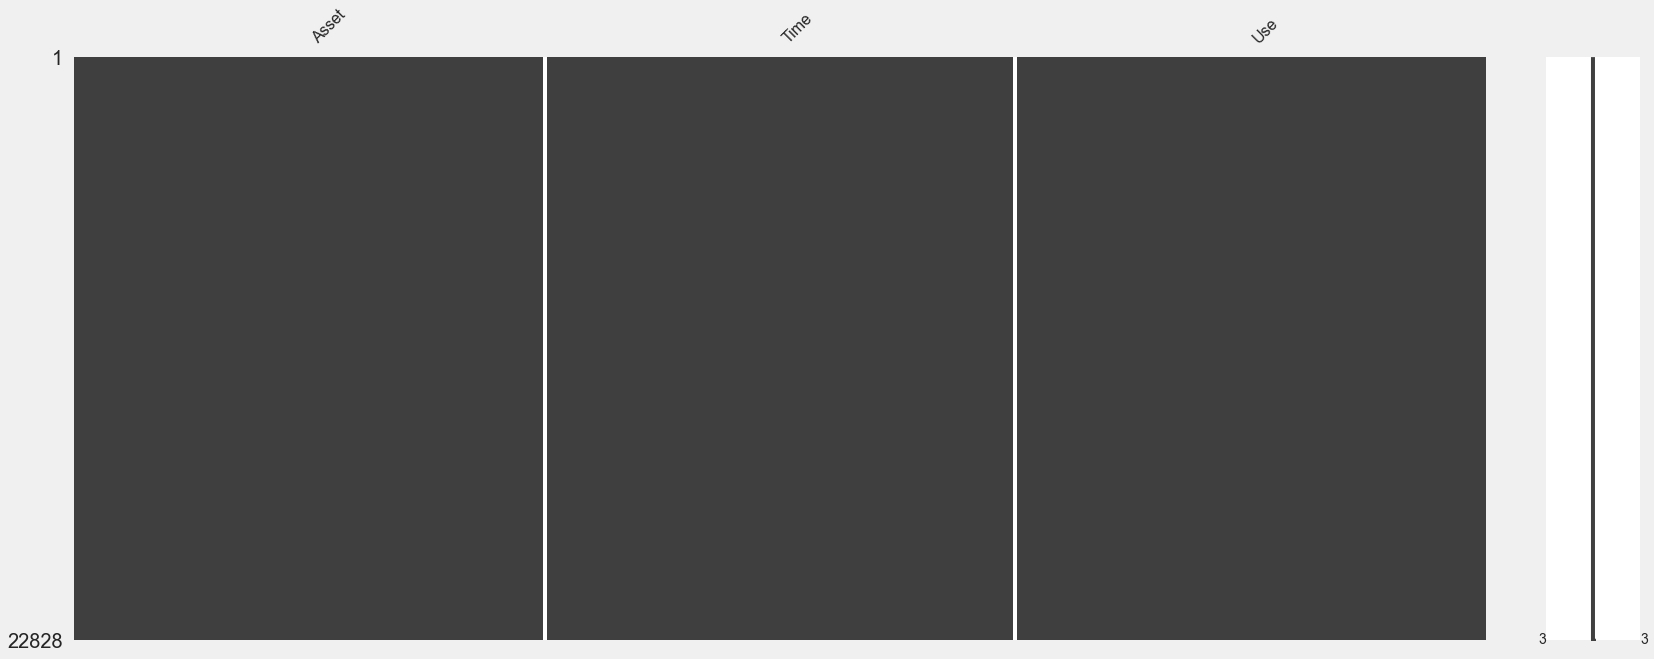

In [335]:
import missingno as mn
mn.matrix(usage_data)

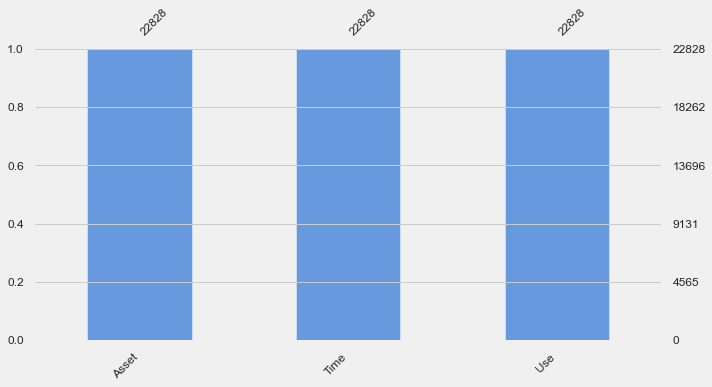

In [336]:
mn.bar(usage_data, color="#69d", sort="ascending", figsize=(10,5), fontsize=12);

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Based on the above Matrix and bar chart, it is evident that the usage_data dataset has no missing values. Therefore, the step to treat the missing values is not required 
    </span>    
</div>

<a id="null"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            4.1.2 Dataset: maintenance_failure
            </span>   
        </font>    
</h3>

<AxesSubplot:>

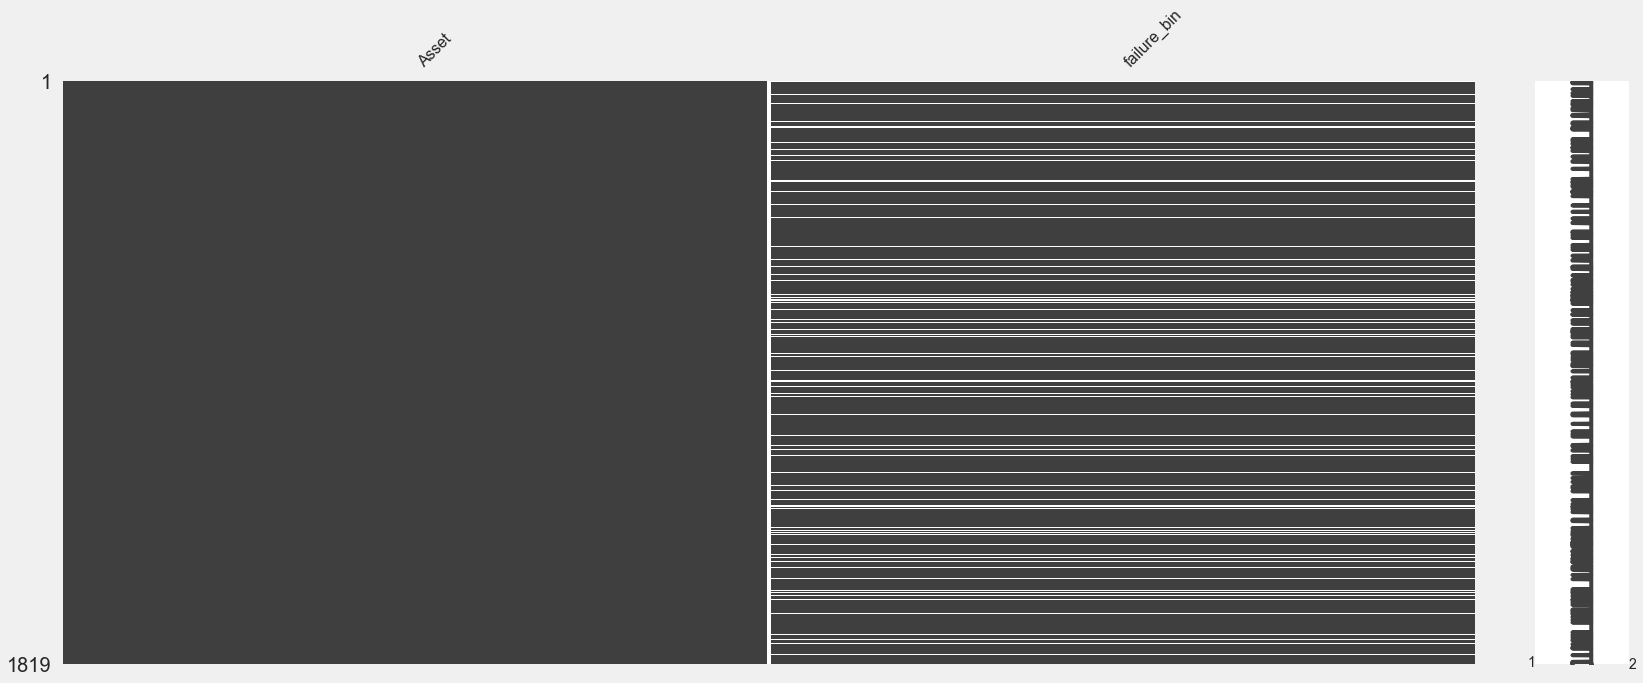

In [337]:
import missingno as mn
mn.matrix(maintenance_failure)

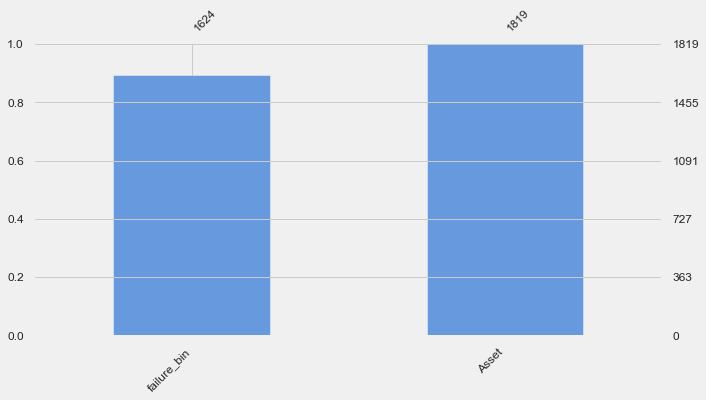

In [338]:
mn.bar(maintenance_failure, color="#69d", sort="ascending", figsize=(10,5), fontsize=12);

In [339]:
# % null value in failure_bin column
round(maintenance_failure.isnull().sum() / maintenance_failure.shape[0] * 100.00,2)

Asset           0.00
failure_bin    10.72
dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>In maintenance_failure dataset, there is 10.72 % of missing values in the failure_bin column when compared to the Asset values.
    </span>    
</div>

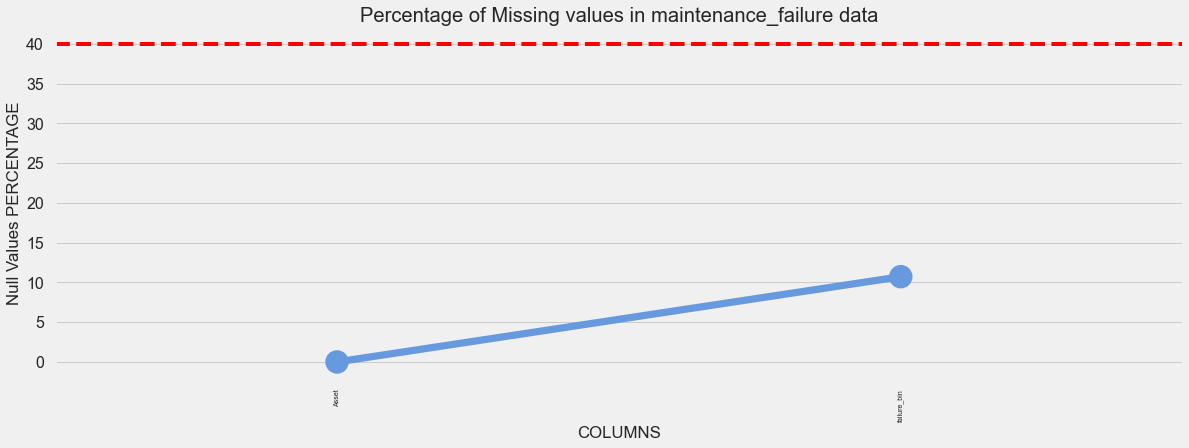

In [340]:
null_maintenance_failure = pd.DataFrame((maintenance_failure.isnull().sum())*100/maintenance_failure.shape[0]).reset_index()
null_maintenance_failure.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_maintenance_failure,color ='#69d')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in maintenance_failure data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Visually checking: In maintenance_failure dataset, there is 10.72 % of missing values in the failure_bin column when compared to the Asset values.
    </span>    
</div>

<a id="null"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            4.1.3 Dataset: maintenance_part_consumption
            </span>   
        </font>    
</h3>

<AxesSubplot:>

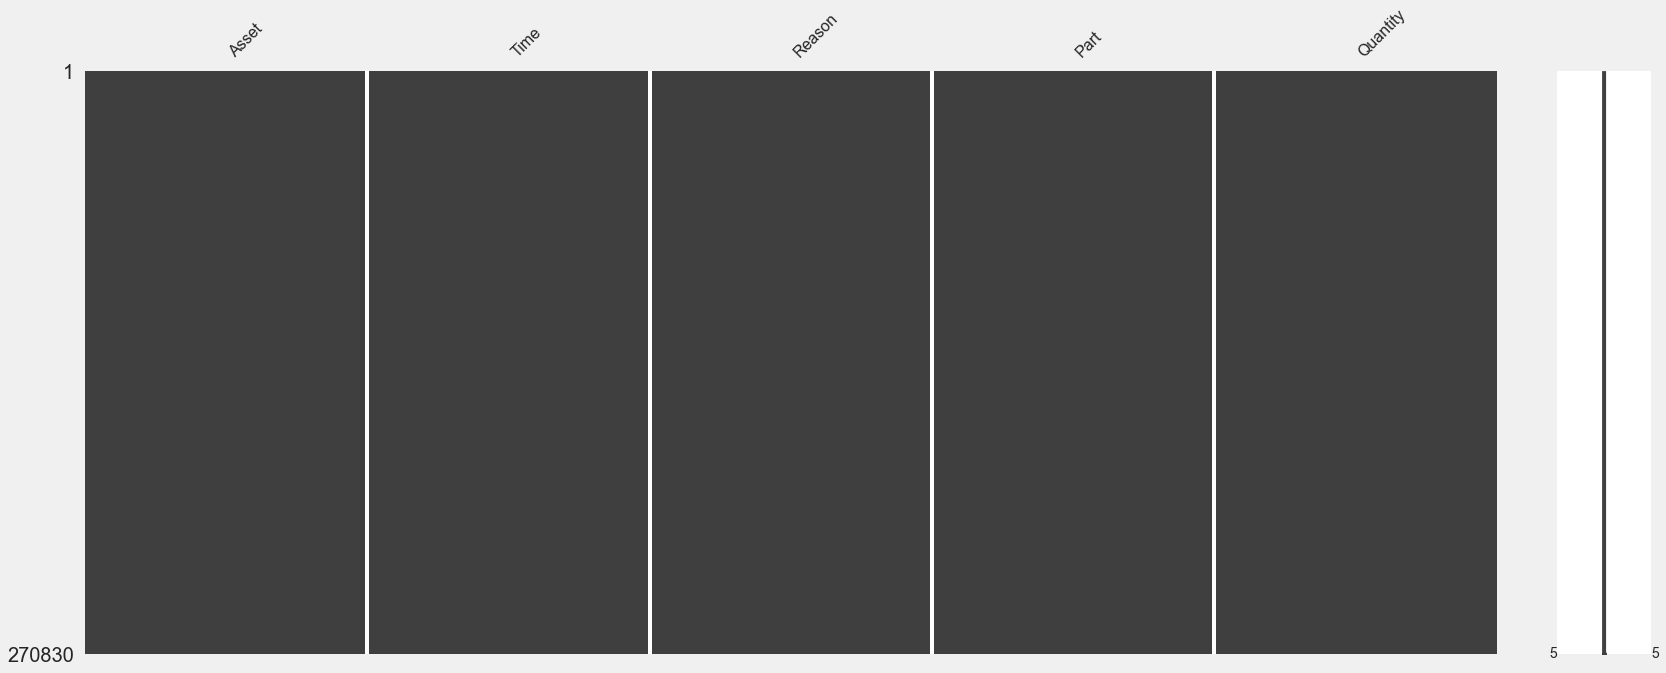

In [341]:
import missingno as mn
mn.matrix(maintenance_part_consumption)

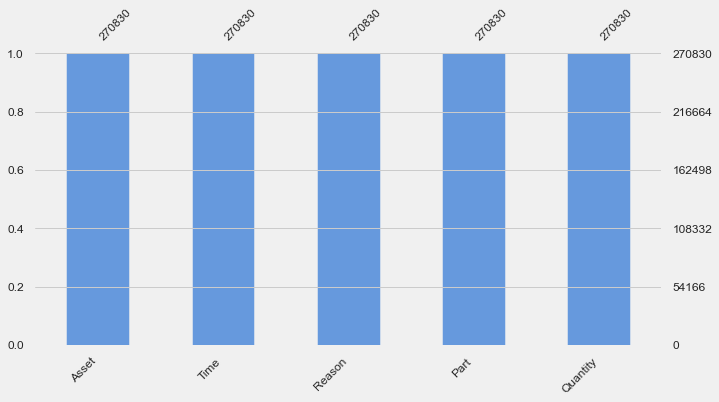

In [342]:
mn.bar(maintenance_part_consumption, color="#69d", sort="ascending", figsize=(10,5), fontsize=12);

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Based on the above Matrix and bar chart, it is evidednt that the maintenance_part_consumption dataset has no missing values. Therefore, the step to treat the missing values is not required 
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            4.2 Analyze & Delete Unnecessary Columns
            </span>   
        </font>    
</h3>

<a id="clean1"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            4.2.1 Dataset: usage_data
            </span>   
        </font>    
</h3>

In [343]:
# Finding the Maximum values for Time and Use variables to understand them better
import math
def max_usage_data(Time, Use):
    i = Use.argmax()
    return (Time[i],Use[i])

In [344]:
max_usage_data(usage_data['Time'],usage_data['Use'])

(635, 187239.12853241747)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Although we found the max values of Time and Use but it seems that this values don't provide us enough insights 
    </span>    
</div>

In [345]:
#Let's use groupby function to groups the Asset and look at the Time and use data
usage_data.groupby('Asset').sum()

,Time,Use
Asset,,
A000204,5702,484355.834002
A000270,2155,106996.662032
A000463,6233,561758.735565
A000495,5344,506646.821388
A001201,4268,187830.378964
...,...,...
A998424,1872,80035.751116
A998861,4089,421355.582796
A998987,4172,534668.574610


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Using Groupby function to group Asset to find the sum of time and Use is not useful because the Time and Use variables have information where wheneever an Asset came for maintenance service the Time and Use was entered. Therefore, we have to analyse the data by creating new variables and use the existing data in an insightful manner. 
    </span>    
</div>

In [346]:
#Analysing the Time and Use data by creating new variables
usage_data_groups = usage_data .groupby('Asset', as_index=False).agg(
    Age_initial=('Time', min),
    Age_lastknown=('Time', max),
    Car_serviced_count=('Time', 'nunique'),
    Distance_initial=('Use', min),
    Distance_lastknown=('Use', max),
)
usage_data_groups.round(2).sort_values('Age_initial')

,Asset,Age_initial,Age_lastknown,Car_serviced_count,Distance_initial,Distance_lastknown
589,A319257,0,641,16,26410.65,28706.81
103,A062344,0,725,14,30450.95,32763.74
449,A250298,0,701,24,28934.09,31452.57
557,A303019,0,730,14,30453.29,32270.08
448,A250211,0,709,9,29701.71,31522.30
...,...,...,...,...,...,...
1469,A776198,706,706,1,25992.56,25992.56
1844,A981329,709,721,2,26051.49,26080.96
1609,A855324,710,729,2,26309.70,26356.97
1031,A539580,717,717,1,25981.18,25981.18


In [347]:
usage_data_groups.describe()

,Age_initial,Age_lastknown,Car_serviced_count,Distance_initial,Distance_lastknown
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,134.725449,670.531151,11.355333,28861.081756,30635.878632
std,177.249117,52.197184,5.024602,2320.317264,4439.611479
min,0.000000,38.000000,1.000000,25740.475447,25746.018902
25%,24.000000,642.000000,8.000000,26616.049638,28711.694598
50%,59.000000,685.000000,11.000000,28548.089724,30835.202716
75%,144.000000,710.000000,14.000000,30831.191005,32551.777443
max,727.000000,730.000000,41.000000,34902.348412,187239.128532


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Using Groupby function we found the following:
        <br>1. Age_initial - It is the Time when the Asset reported first for maintenance service
        <br>2. Age_lastknown - It is the Time when the Asset reported last for maintenance service
        <br>3. Car_serviced_count - Using the Unique Time count we are finding the Asset visits for maintenance service
        <br>4. Distance_initial - The Distance travelled by the Asset when reported first for maintenance service
        <br>5. Distance_lastknown - The Distance travelled by the Asset when reported last for maintenance service 
        <br>
       Using the above data we would further investigate the total time spent and the total distance travelled by the Asset for maintenance service
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            4.2.2 Creating new Varibles, dataset:usage_data
            </span>   
        </font>    
</h3>

In [348]:
#Calculating the total time spent by the Assest for maintenance service 
usage_data_groups['Time_in_service'] = usage_data_groups['Age_lastknown'] - usage_data_groups['Age_initial']

In [349]:
#Calculating the total distance travelled by the Assest for maintenance service 
usage_data_groups['Distance_service'] = usage_data_groups['Distance_lastknown'] - usage_data_groups['Distance_initial']

In [350]:
# Rearranging columns in the usage_data_groups for easy understanding
usage_data_groups = usage_data_groups[["Asset","Car_serviced_count","Age_initial","Age_lastknown","Time_in_service","Distance_initial","Distance_lastknown",
                                      "Distance_service"]]
usage_data_groups.round(2).head()

,Asset,Car_serviced_count,Age_initial,Age_lastknown,Time_in_service,Distance_initial,Distance_lastknown,Distance_service
0,A000204,15,46,722,676,31449.65,33212.76,1763.11
1,A000270,3,435,617,182,26378.56,27036.77,658.21
2,A000463,18,30,616,586,30451.54,31894.00,1442.47
3,A000495,16,6,695,689,30851.25,32540.25,1689.00
4,A001201,7,395,720,325,26136.39,27187.90,1051.51


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Calculated the following new variables:
        <br>1. Time_in_service - total time spent by the Assest for maintenance service, derived by the difference between "Age_lastknown" and "Age_initial" 
        <br>2. Distance_service - total distance travelled by the Assest for maintenance service, derived by the difference between "Distance_lastknown" and "Distance_initial" 
        <br>
       </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            4.2.3 Inspecting usage_data_groups dataframe
            </span>   
        </font>    
</h3>

In [351]:
# Database columns types
usage_data_groups.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Asset               1894 non-null   object 
 1   Car_serviced_count  1894 non-null   int64  
 2   Age_initial         1894 non-null   int64  
 3   Age_lastknown       1894 non-null   int64  
 4   Time_in_service     1894 non-null   int64  
 5   Distance_initial    1894 non-null   float64
 6   Distance_lastknown  1894 non-null   float64
 7   Distance_service    1894 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 133.2+ KB


In [352]:
usage_data_groups.isnull().sum()

Asset                 0
Car_serviced_count    0
Age_initial           0
Age_lastknown         0
Time_in_service       0
Distance_initial      0
Distance_lastknown    0
Distance_service      0
dtype: int64

In [353]:
# Getting unique counts of Assets (Cars) in the Asset_groups_usage_data
Unique_usage_data_groups = len(usage_data_groups['Asset'].unique())
print('Asset(Cars) - ',Unique_usage_data_groups)

Asset(Cars) -  1894


In [354]:
usage_data_groups[['Time_in_service','Distance_initial','Distance_service','Car_serviced_count']].describe()

,Time_in_service,Distance_initial,Distance_service,Car_serviced_count
count,1894.000000,1894.000000,1894.000000,1894.000000
mean,535.805702,28861.081756,1774.796876,11.355333
std,182.555821,2320.317264,3702.827551,5.024602
min,0.000000,25740.475447,0.000000,1.000000
25%,526.250000,26616.049638,1362.595924,8.000000
50%,601.500000,28548.089724,1777.115096,11.000000
75%,654.000000,30831.191005,2214.391610,14.000000
max,730.000000,34902.348412,159919.351820,41.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Both in "Time_in_service" and " Distance_service" variables we got min value as 0 which cannot be in real scenario 
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            4.3  Identifying and treating the 0 min values for dataframe: usage_data_groups
            </span>   
        </font>    
</h3>

In [355]:
#Finding the count of records with zero values
(usage_data_groups == 0).sum(axis=0)

Asset                  0
Car_serviced_count     0
Age_initial           12
Age_lastknown          0
Time_in_service       21
Distance_initial       0
Distance_lastknown     0
Distance_service      24
dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>We have 21 records in "Time_in_service" and 24 records in "Distance_service" with value= 0      
    </span>    
</div>

<a id="impute"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
             4.3.1 Zero Value Data Imputation
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for usage_data_groups: </b> 
        <ul>
            <li>To impute zero values in continuous variables, we plotted the distribution of the columns and used </li>
            <ul>
                <li>median if the distribution is skewed</li>
                <li>mode if the distribution pattern is preserved.</li>
            </ul>        
        </ul>
    </span>    
</div>

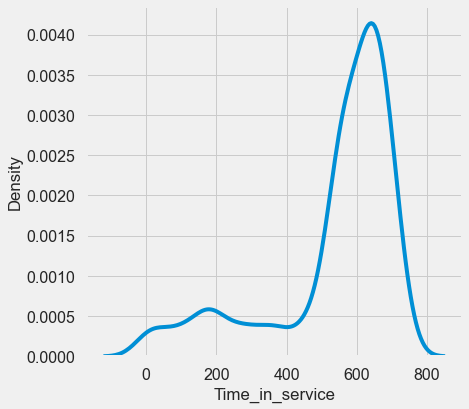

In [356]:
#kernel density estimate (KDE) plot for Time_in_service
plt.figure(figsize=(6,6))
sns.kdeplot(usage_data_groups['Time_in_service'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>As the above kernel density estimate (KDE) plot for Time_in_service is negatively skewed, therefore we impute zero values in "Time_in_service" variable using the median() of the non-zero values of the column      
    </span>    
</div>

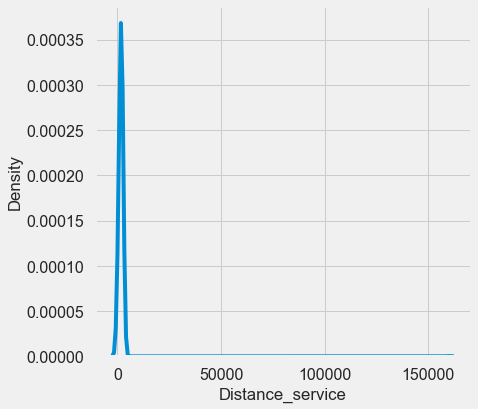

In [357]:
#kernel density estimate (KDE) plot for Distance_service
plt.figure(figsize=(6,6))
sns.kdeplot(usage_data_groups['Distance_service'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There is a single peak at the left side of the distribution indicating the standard deviation being very small. For Zero values imputation we will use the median() of the non-zero values of the column      
    </span>    
</div>

<a id="impute"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
             4.3.2 Non-zero Median calculation and imputation
            </span>   
        </font>    
</h3>

In [358]:
#Finding the Non-zero median for Time_in_service
Time_in_service_nonzero_median = usage_data_groups[ usage_data_groups.Time_in_service != 0 ].median()

In [359]:
#Non-zero median for all Time_in_service
Time_in_service_nonzero_median

Car_serviced_count       12.000000
Age_initial              58.000000
Age_lastknown           685.000000
Time_in_service         603.000000
Distance_initial      28612.277102
Distance_lastknown    30873.423382
Distance_service       1786.743202
dtype: float64

In [360]:
# Zero Value Imputation using Non-zero median for Time_in_service
usage_data_groups['Time_in_service'].replace(to_replace=0, value = Time_in_service_nonzero_median['Time_in_service'], inplace = True) 

In [361]:
#Finding the Non-zero median for Time_in_service
Distance_service_nonzero_median = usage_data_groups[ usage_data_groups.Distance_service != 0 ].median()

In [362]:
#Non-zero median for all Distance_service
Distance_service_nonzero_median

Car_serviced_count       12.000000
Age_initial              58.000000
Age_lastknown           685.000000
Time_in_service         603.000000
Distance_initial      28616.507634
Distance_lastknown    30882.759728
Distance_service       1787.910246
dtype: float64

In [363]:
# Zero Value Imputation using Non-zero median for Time_in_service
usage_data_groups['Distance_service'].replace(to_replace=0, value = Distance_service_nonzero_median['Distance_service'], inplace = True) 

In [364]:
#Finding the count of records with zero values
(usage_data_groups == 0).sum(axis=0)

Asset                  0
Car_serviced_count     0
Age_initial           12
Age_lastknown          0
Time_in_service        0
Distance_initial       0
Distance_lastknown     0
Distance_service       0
dtype: int64

In [365]:
usage_data_groups[['Time_in_service','Distance_initial','Distance_service','Car_serviced_count']].describe()

,Time_in_service,Distance_initial,Distance_service,Car_serviced_count
count,1894.000000,1894.000000,1894.000000,1894.000000
mean,542.491552,28861.081756,1797.452549,11.355333
std,173.629442,2320.317264,3697.361912,5.024602
min,1.000000,25740.475447,2.625847,1.000000
25%,535.250000,26616.049638,1392.939049,8.000000
50%,603.000000,28548.089724,1787.910246,11.000000
75%,654.000000,30831.191005,2214.391610,14.000000
max,730.000000,34902.348412,159919.351820,41.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>No more records in "Time_in_service" and "Distance_service" with value= 0      
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            4.4  Identifying the outliers, dataframe: usage_data_groups
            </span>   
        </font>    
</h3>

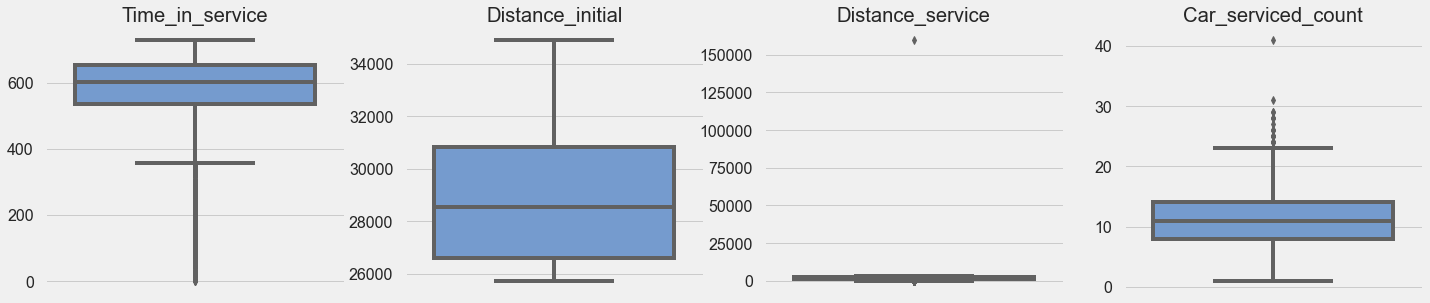

In [366]:
# Finding outlier information in usage_data_groups
plt.figure(figsize=(22,10))

usage_data_groups_outliers = ['Time_in_service','Distance_initial','Distance_service','Car_serviced_count']
for i in enumerate(usage_data_groups_outliers):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=usage_data_groups[i[1]], color='#69d')
    plt.title(i[1])
    plt.ylabel("")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>We can see an outlier with value greater than 150000 in Distance_service      
    </span>    
</div>

In [367]:
usage_data_groups[['Time_in_service','Distance_initial','Distance_service','Car_serviced_count']].describe()

,Time_in_service,Distance_initial,Distance_service,Car_serviced_count
count,1894.000000,1894.000000,1894.000000,1894.000000
mean,542.491552,28861.081756,1797.452549,11.355333
std,173.629442,2320.317264,3697.361912,5.024602
min,1.000000,25740.475447,2.625847,1.000000
25%,535.250000,26616.049638,1392.939049,8.000000
50%,603.000000,28548.089724,1787.910246,11.000000
75%,654.000000,30831.191005,2214.391610,14.000000
max,730.000000,34902.348412,159919.351820,41.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Outliers:
        <br>1. We can see outliers in Distance_service as the maximum value is 159919 and therfore we have to treat the outlier 
        <br>2. We will also treat outliers in Time_in_service
        <br>3. For Car_serviced_count the max value is 41, in real scenario it is possible therefore we would not treat any outliers for this variable
        <br>
       </span>    
</div>

<a id="outliers"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            5.  Treating the Outliers: dataframe: usage_data_groups
            </span>   
        </font>    
</h2>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            5.1  Outliers: lower_range and upper_range
            </span>   
        </font>    
</h3>

In [368]:
# Function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [369]:
treat_outlier(usage_data_groups[['Time_in_service']])

(357.125, 832.125)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Lower and Upper Fence for Time_in_service is 357.12 and 832.12    
    </span>    
</div>

In [370]:
treat_outlier(usage_data_groups[['Distance_service']])

(160.76020647501446, 3446.5704520675326)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Lower and Upper Fence for Distance_service is 160.76 and 3446.57    
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            5.2  Outliers: Treating Outliers
            </span>   
        </font>    
</h3>

In [371]:
#Replacing the outlier values with the Upper and Lower fence values
for feature in usage_data_groups[['Time_in_service','Distance_service']]: 
    lr,ur=treat_outlier(usage_data_groups[feature])
    usage_data_groups[feature]=np.where(usage_data_groups[feature]>ur,ur,usage_data_groups[feature])
    usage_data_groups[feature]=np.where(usage_data_groups[feature]<lr,lr,usage_data_groups[feature])

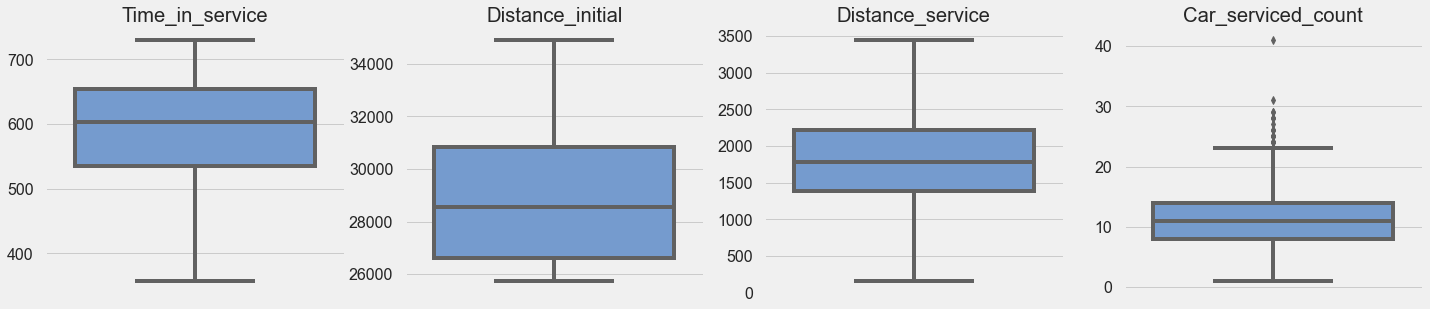

In [372]:
# Finding outlier information in usage_data_groups after Treating the Outliers: Using Box plots
plt.figure(figsize=(22,10))

usage_data_groups_outliers = ['Time_in_service','Distance_initial','Distance_service','Car_serviced_count' ]
for i in enumerate(usage_data_groups_outliers):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=usage_data_groups[i[1]], color='#69d')
    plt.title(i[1])
    plt.ylabel("")

In [373]:
usage_data_groups[['Time_in_service','Distance_initial','Distance_service','Car_serviced_count']].describe()

,Time_in_service,Distance_initial,Distance_service,Car_serviced_count
count,1894.000000,1894.000000,1894.000000,1894.000000
mean,570.007194,28861.081756,1716.605998,11.355333
std,113.573812,2320.317264,671.946848,5.024602
min,357.125000,25740.475447,160.760206,1.000000
25%,535.250000,26616.049638,1392.939049,8.000000
50%,603.000000,28548.089724,1787.910246,11.000000
75%,654.000000,30831.191005,2214.391610,14.000000
max,730.000000,34902.348412,3446.570452,41.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>All outliers are treated    
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            5.3  Duplicate Rows based on all columns
            </span>   
        </font>    
</h3>

In [374]:
duplicateRows_usage_data_groups = usage_data_groups[usage_data_groups.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRows_usage_data_groups)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Asset, Car_serviced_count, Age_initial, Age_lastknown, Time_in_service, Distance_initial, Distance_lastknown, Distance_service]
Index: []


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>No Duplicate Rows based on all columns in usage_data_groups dataframe    
    </span>    
</div>

<a id="analysis"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            6.  Data Analysis: usage_data_groups
            </span>   
        </font>    
</h2>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            6.1  Univariate Histograms to see the distributions
            </span>   
        </font>    
</h3>

<AxesSubplot:xlabel='Time_in_service', ylabel='Density'>

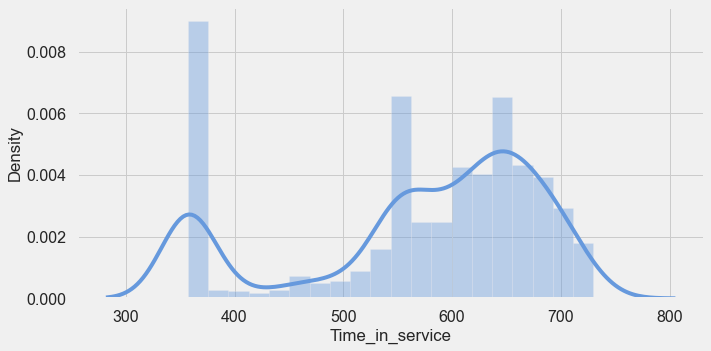

In [375]:
#Univariate Histograms to see the distributions: Time_in_service
plt.figure(figsize=(10,5))
sns.distplot(usage_data_groups['Time_in_service'],color="#69d")

<AxesSubplot:xlabel='Distance_service', ylabel='Density'>

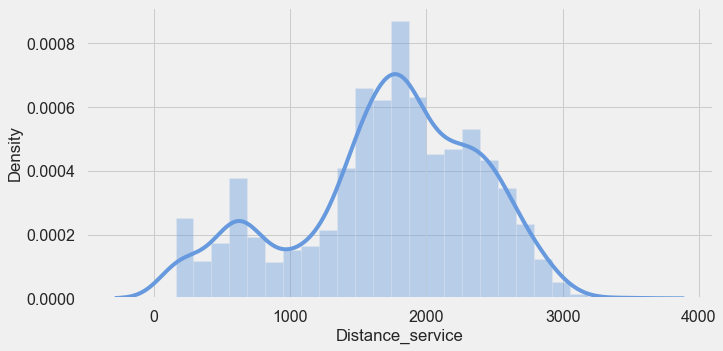

In [376]:
#Univariate Histograms to see the distributions:Distance_service 
plt.figure(figsize=(10,5))
sns.distplot(usage_data_groups['Distance_service'],color="#69d")

<AxesSubplot:xlabel='Car_serviced_count', ylabel='Density'>

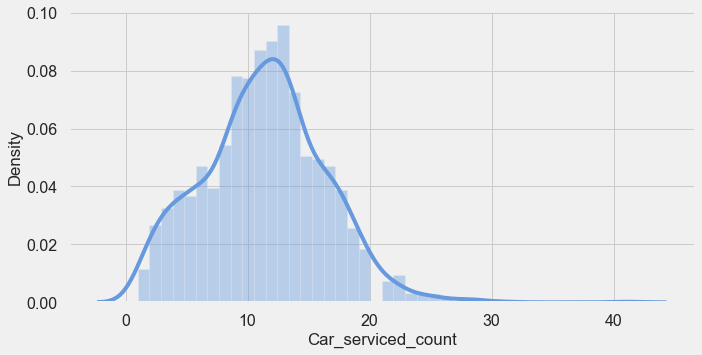

In [377]:
#Univariate Histograms to see the distributions:Car_serviced_count
plt.figure(figsize=(10,5))
sns.distplot(usage_data_groups['Car_serviced_count'],color="#69d")

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            6.2  Checking pairwise distribution of the continuous variables
            </span>   
        </font>    
</h3>

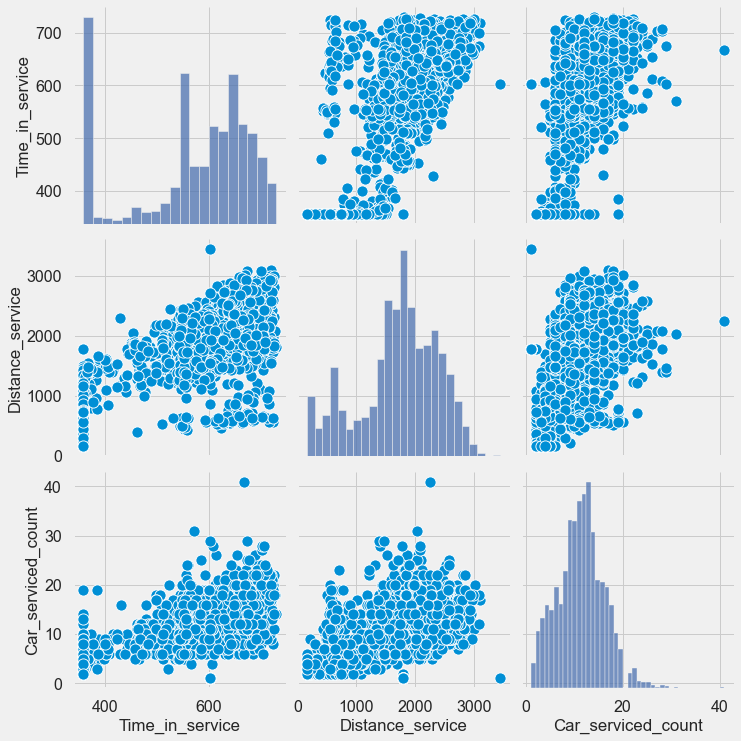

In [378]:
#Pairwise distribution for 'Time_in_service','Distance_service' and'Car_serviced_count'
sns.pairplot(usage_data_groups[['Time_in_service','Distance_service','Car_serviced_count']], height=3.5)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Positive Correlation between all: 'Time_in_service','Distance_service' and 'Car_serviced_count'     
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            6.3  Scatter plot with regression function fitting
            </span>   
        </font>    
</h3>

<AxesSubplot:xlabel='Time_in_service', ylabel='Distance_service'>

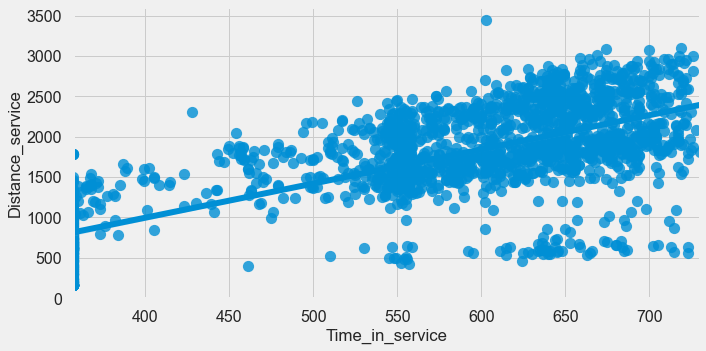

In [379]:
#Scatter plot with regression function fitting - Distance_service and Time_in_service
plt.figure(figsize=(10,5))
sns.regplot(data = usage_data_groups, x = 'Time_in_service', y = 'Distance_service')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Positive Correlation between 'Distance_service' and 'Time_in_service'     
    </span>    
</div>

<AxesSubplot:xlabel='Time_in_service', ylabel='Car_serviced_count'>

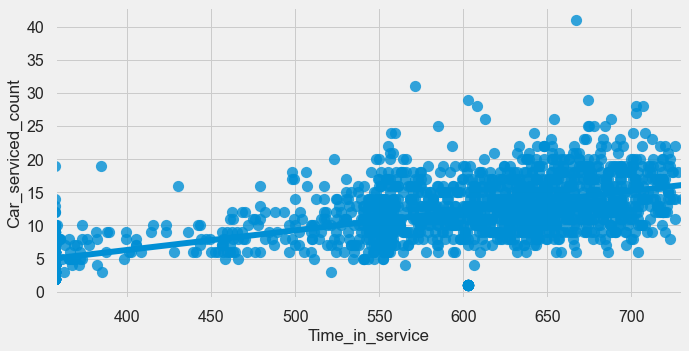

In [380]:
#Scatter plot with regression function fitting - Car_serviced_count and Time_in_service
plt.figure(figsize=(10,5))
sns.regplot(data = usage_data_groups, x = 'Time_in_service', y = 'Car_serviced_count')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Positive Correlation between 'Car_serviced_count' and 'Time_in_service'     
    </span>    
</div>

<AxesSubplot:xlabel='Distance_service', ylabel='Car_serviced_count'>

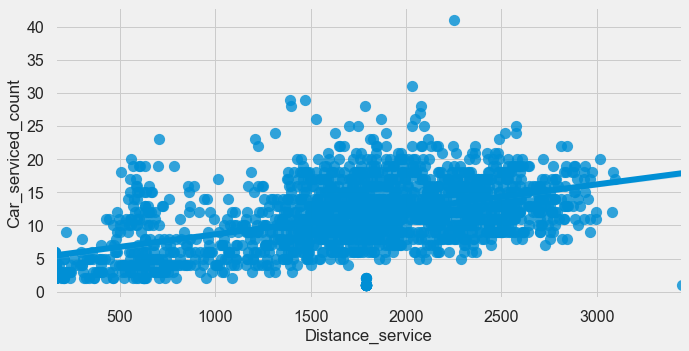

In [381]:
#Scatter plot with regression function fitting - Car_serviced_count and Distance_service
plt.figure(figsize=(10,5))
sns.regplot(data = usage_data_groups, x = 'Distance_service', y = 'Car_serviced_count')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Positive Correlation between 'Distance_service' and 'Car_serviced_count'     
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            6.4  Correlation coeffiecients
            </span>   
        </font>    
</h3>

<AxesSubplot:>

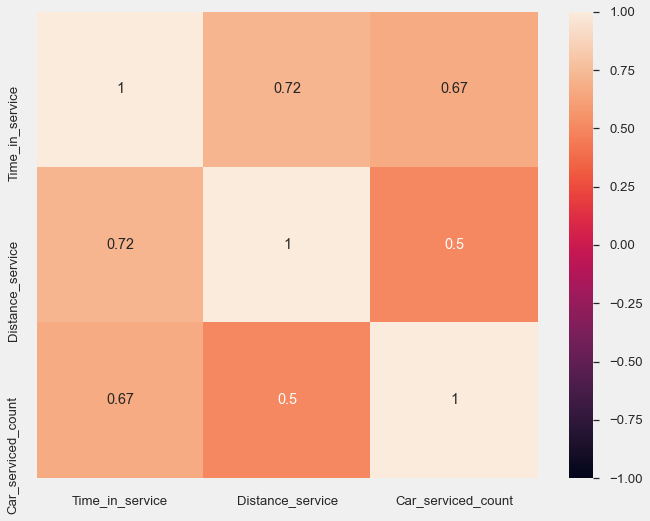

In [382]:
# Correlation coeffiecients using heat map 
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(usage_data_groups[['Time_in_service','Distance_service','Car_serviced_count']].corr(), annot=True,vmin=-1,vmax=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Correlation coeffiecients using heat map:
        <br>1. Correlation coeffiecient between Time_in_service and Distance_service = 0.72 | positive correlation  
        <br>2. Correlation coeffiecient between Distance_service and Car_serviced_count = 0.5 | positive correlation 
        <br>3. Correlation coeffiecient between Car_serviced_count and Time_in_service = 0.67 | positive correlation 
        <br>
       </span>    
</div>

<a id="columns"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            7.  Analyze & Delete Unnecessary Columns - maintenance_part_consumption
            </span>   
        </font>    
</h2>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            7.1  Investigating maintenance_part_consumption
            </span>   
        </font>    
</h3> 

In [383]:
maintenance_part_consumption.describe(include="all")

,Asset,Time,Reason,Part,Quantity
count,270830,270830.000000,270830,270830,270830.000000
unique,1913,NaN,14,3192,NaN
top,A333832,NaN,R707,P566684,NaN
freq,482,NaN,136714,22837,NaN
mean,NaN,378.872691,NaN,NaN,3.565059
std,NaN,212.522371,NaN,NaN,20.420610
min,NaN,0.000000,NaN,NaN,-15.000000
25%,NaN,195.000000,NaN,NaN,1.000000
50%,NaN,388.000000,NaN,NaN,1.000000
75%,NaN,567.000000,NaN,NaN,2.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        <br>1. Total unique Asset = 1913, Unique reasons = 14 and Unique Parts = 3192         
        <br>2. Negative values present in "Quantity" Variable
        <br>3. The Time volumn is same as in usage_data, so we can delete this column  
        <br>
       </span>    
</div>

In [384]:
# Dataset columns types
maintenance_part_consumption.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270830 entries, 0 to 270829
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Asset     270830 non-null  object
 1   Time      270830 non-null  int64 
 2   Reason    270830 non-null  object
 3   Part      270830 non-null  object
 4   Quantity  270830 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 10.3+ MB


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        <br>1. No Null values         
        <br>2. Data types are in accordance to the data
        <br>
       </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            7.2 Analyze & Delete Unnecessary Columns
            </span>   
        </font>    
</h3>

In [385]:
# Dropping "Time" Column
maintenance_part_consumption = maintenance_part_consumption.drop(['Time'], axis=1)
maintenance_part_consumption.head()

,Asset,Reason,Part,Quantity
0,A311482,R417,P361646,1
1,A174613,R707,P991287,1
2,A174613,R707,P169319,1
3,A060723,R193,P184448,0
4,A174613,R707,P097048,1


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Deleted the 'Time' column from maintenance_part_consumption dataset as the same time column is present in the usage_data dataset and therefore we will use the same time column and its calculated fields from usage_data dataset into this dataset      
    </span>    
</div>

In [386]:
# Getting unique counts of all the objects in the maintenance_part_consumption dataset
Unique_maintenance_part_consumption_Asset = len(maintenance_part_consumption['Asset'].unique())
print('Asset(Cars) - ',Unique_maintenance_part_consumption_Asset)
print('Repair Reason - ',len(maintenance_part_consumption['Reason'].unique()))
print('Spare Parts changed -',len(maintenance_part_consumption['Part'].unique()))

Asset(Cars) -  1913
Repair Reason -  14
Spare Parts changed - 3192


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        <br>1. Unique Asset - 1913 unique Assets in this dataset when compared to 1894 unique Assets in usage_data dataset                <br>2. Unique Reasons - There are 14 unique maintenance service reasons for all the Assets
          <br>3. Spare Parts changed - 3192 unique spare parts are used in the entire dataset for all the service reasons
        <br>
       </span>    
</div>

In [387]:
# Converting Negative quantity to positive quantity
maintenance_part_consumption['Quantity'] = abs(maintenance_part_consumption['Quantity'])

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        <br>A few of the Quantity were negative | it is a data entry error | therfore converting them to absolute values                <br>
       </span>    
</div>

In [388]:
maintenance_part_consumption.describe(include="all")

,Asset,Reason,Part,Quantity
count,270830,270830,270830,270830.000000
unique,1913,14,3192,NaN
top,A333832,R707,P566684,NaN
freq,482,136714,22837,NaN
mean,NaN,NaN,NaN,3.565362
std,NaN,NaN,NaN,20.420557
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,2.000000


<a id="clean1"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            7.2.1 Top reasons affecting the Asset
            </span>   
        </font>    
</h3>

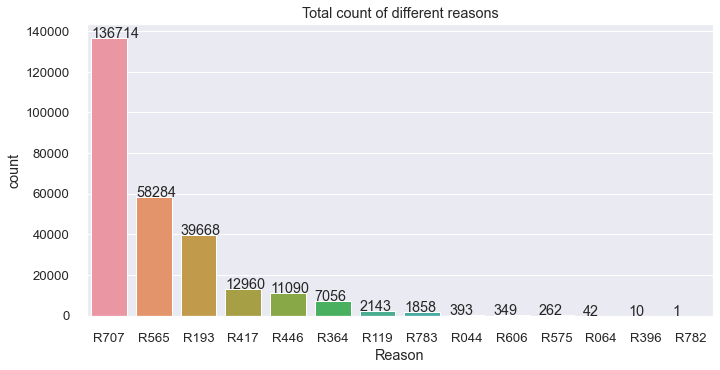

In [389]:
# Top maintenance service reasons 
plt.figure(figsize=(10,5))
sns.set_palette("pastel")
ax = sns.countplot(x="Reason", data=maintenance_part_consumption, 
                   order = maintenance_part_consumption['Reason'].value_counts().index)
plt.title('Total count of different reasons')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> The top 3 reasons for maintenance service for the Asset is:
        <br>1. R707 - Transmission Range Sensor Circuit Low Input       
        <br>2. R565 - Engine - Canister Purge Solenoid Circuit Fault
        <br>3. R193-  Fuel Rail Pressure Sensor Circuit High Input
       </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            7.2.2 Grouping by Asset
            </span>   
        </font>    
</h3>

In [390]:
# Grouping by Assest 
maintenance_part_consumption_groups = maintenance_part_consumption.groupby('Asset', as_index=False).agg(
    Reason_count=('Reason', 'count'),
    Reason_unique=('Reason', 'nunique'),
    Parts_count=('Part', 'count'),
    Parts_unique=('Part', 'nunique'),
    Quantity_total=('Quantity', 'sum')
           
)
maintenance_part_consumption_groups.round(2).sort_values('Quantity_total', ascending = False)

,Asset,Reason_count,Reason_unique,Parts_count,Parts_unique,Quantity_total
1680,A885351,174,5,174,93,5509
1012,A522012,185,4,185,97,4931
1557,A818076,248,6,248,158,4647
1040,A537042,185,5,185,92,4630
524,A283388,358,7,358,174,4484
...,...,...,...,...,...,...
1487,A776409,2,1,2,2,2
1404,A726926,1,1,1,1,1
277,A147881,1,1,1,1,1
1128,A580087,1,1,1,1,1


In [391]:
maintenance_part_consumption_groups.describe(include="all")

,Asset,Reason_count,Reason_unique,Parts_count,Parts_unique,Quantity_total
count,1913,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
unique,1913,NaN,NaN,NaN,NaN,NaN
top,A095743,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,141.573445,4.595400,141.573445,74.676947,504.760585
std,NaN,67.096929,1.484727,67.096929,33.275841,439.200143
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,110.000000,4.000000,110.000000,55.000000,270.000000
50%,NaN,149.000000,5.000000,149.000000,76.000000,427.000000
75%,NaN,182.000000,6.000000,182.000000,95.000000,658.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> After grouping by Asset, following are the observations:
        <br>1. Reasons - Although there are 14 unique reasons but the maximum unique reasons associated with an Asset is 9     
        <br>2. Parts - The maximum number of unique parts used for maintenance service on any assest is 314
        <br>3. Quantity - The maximum total quantity of different parts used in any Asset is 5509
       </span>    
</div>

In [11]:
### Check for assets which came for only one reason throughout

<a id="parts"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            8.  Data Analysis: maintenance_part_consumption
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Approach for Data Analysis: maintenance_part_consumption  </b> 
        <ul>
            <li>Reasons Variable - Creating a Pivot table with index as Asset, Reasons as columns and sum of the parts quantity as the Values </li>
          
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            8.1  Pivot Table - bringing Reasons Variable to the columns
            </span>   
        </font>    
</h3>

In [392]:
maintenance_part_consumption_pivottable= pd.pivot_table(maintenance_part_consumption, values='Quantity', index=['Asset'],
                    columns=['Reason'], aggfunc=np.sum,fill_value=0)

In [393]:
maintenance_part_consumption_pivottable.head()

Reason,R044,R064,R119,R193,R364,R396,R417,R446,R565,R575,R606,R707,R782,R783
Asset,,,,,,,,,,,,,,
A000204,0,0,6,88,3,0,0,3,106,0,0,194,0,0
A000270,0,0,0,0,0,0,0,0,0,0,0,108,0,0
A000463,0,0,3,96,1,0,0,5,0,0,0,229,0,6
A000495,0,0,4,123,13,0,0,39,394,0,0,145,0,0
A001201,0,0,0,7,0,0,0,0,0,0,0,87,0,0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> 
        <br>1. All 14 Reasons placed as columns     
        <br>2. The values under every reason against Assest is the sum of the parts quantity
       </span>    
</div>

In [394]:
maintenance_part_consumption_pivottable.describe(include="all")

Reason,R044,R064,R119,R193,R364,R396,R417,R446,R565,R575,R606,R707,R782,R783
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.0,1913.000000
mean,0.423941,0.045478,4.129117,50.662311,9.936226,0.050706,25.542081,11.542081,128.056456,0.348144,0.538421,271.064297,0.0,2.421328
std,3.584251,1.815358,58.613152,94.279174,28.868935,2.217758,106.711541,26.408749,260.031047,3.760073,8.042624,264.827621,0.0,10.663756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,22.000000,2.000000,0.000000,0.000000,3.000000,79.000000,0.000000,0.000000,218.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,60.000000,7.000000,0.000000,0.000000,13.000000,172.000000,0.000000,0.000000,386.000000,0.0,1.000000
max,100.000000,79.000000,2391.000000,2006.000000,477.000000,97.000000,3346.000000,351.000000,4246.000000,112.000000,203.000000,5279.000000,0.0,258.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> 
        <br>1. For all the 14 reasons the Maximum values is in different number range - this could be in Real Scenario - therefore these values will not be treated as Outliers   
        <br>2. Reason R782 has all the values as Zero, the values can neither be assumed nor imputed, therefore we will delete this column 
        <br>
       </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            8.2  Top 3 maintenance service reasons for every Assest
            </span>   
        </font>    
</h3>

In [395]:
Top_reasons_by_Asset =pd.DataFrame(maintenance_part_consumption_pivottable.apply(lambda x:list(maintenance_part_consumption_pivottable.columns[np.array(x).argsort()[::-1][:3]]), axis=1).to_list(),  
                                                 index=maintenance_part_consumption_pivottable.index, columns=['Top1', 'Top2', 'Top3'])


In [396]:
Top_reasons_by_Asset.head()

,Top1,Top2,Top3
Asset,,,
A000204,R707,R565,R193
A000270,R707,R783,R782
A000463,R707,R193,R783
A000495,R565,R707,R193
A001201,R707,R193,R783


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Just by looking at the snapshot of the Top_reasons_by_Asset, we can infer that there are 3 top reasons that is realted to the  maintenance service for all the Assets:
        <br>1. R707 - Transmission Range Sensor Circuit Low Input       
        <br>2. R565 - Engine - Canister Purge Solenoid Circuit Fault
        <br>3. R193-  Fuel Rail Pressure Sensor Circuit High Input
       </span>    
</div>

In [397]:
# Total quantity of parts used by reasons
maxValues = maintenance_part_consumption_pivottable.sum() 
  
print(maxValues.sort_values(ascending=False)) 

Reason
R707    518546
R565    244972
R193     96917
R417     48862
R446     22080
R364     19008
R119      7899
R783      4632
R606      1030
R044       811
R575       666
R396        97
R064        87
R782         0
dtype: int64


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Reasons R707, R565 AND R193 which are also the top 3 reasons and consumes 89% of the total parts quantity 
       </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            8.3  Bins for parts quantity - Low and High
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Approach for creating Bins for parts quantity - Low and High  </b> 
        <ul>
            <li> Low - Parts quantity equal to 1</li>
            <li> High - Parts quantity more than 1</li>
           </ul>  
</div>

In [398]:
# Creating bins for Quantity - Low and High
bins = [0,1,100]
slots = ['Low','High']

maintenance_part_consumption['Quantity_categories']=pd.cut(maintenance_part_consumption['Quantity'],bins=bins,labels=slots)

In [399]:
maintenance_part_consumption['Quantity_categories'].value_counts(normalize=True)*100

Low     69.744828
High    30.255172
Name: Quantity_categories, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Proportion of Low and High categories in total parts consumption:
        <br>1. Low category - Almost 70% of the total parts consumed are those parts where the quantity used is only 1, these could be big sized or critical parts        
        <br>2. High category - Almost 30% of the total parts consumed are those parts where the quantity used is greater than 1, possibly small sized or non-critical parts
        </span>    
</div>

In [400]:
maintenance_part_consumption.tail()

,Asset,Reason,Part,Quantity,Quantity_categories
270825,A634532,R707,P079223,1,Low
270826,A634532,R707,P762803,1,Low
270827,A634532,R707,P839776,1,Low
270828,A634532,R707,P222591,1,Low
270829,A634532,R707,P196543,12,High


<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            8.4  Arranging Low & High bins by Pivoting and stacking for better understanding
            </span>   
        </font>    
</h3>

In [401]:
maintenance_part_consumption_pivottable2= pd.pivot_table(maintenance_part_consumption, values='Quantity', index=['Asset'],
                    columns=['Quantity_categories','Reason'], aggfunc=np.sum,fill_value=0)


In [402]:
maintenance_part_consumption_pivottable2.head()

Quantity_categories  Low                                                             High                                                            
Reason              R044 R064 R119 R193 R364 R396 R417 R446 R565 R575 R606 R707 R783 R044 R064 R119 R193 R364 R396 R417 R446 R565 R575 R606 R707 R783
Asset                                                                                                                                                
A000204                0    0    6   41    3    0    0    3   15    0    0   61    0    0    0    0   47    0    0    0    0   91    0    0  133    0
A000270                0    0    0    0    0    0    0    0    0    0    0   19    0    0    0    0    0    0    0    0    0    0    0    0   89    0
A000463                0    0    3   31    1    0    0    5    0    0    0   43    2    0    0    0   65    0    0    0    0    0    0    0  186    4
A000495                0    0    4   28    5    0    0   18   30    0    0   49    0    0    0    0   95    8    0    0   21  164    0    0   96    0
A001201                0    0    0    5    0    0    0    0    0    0    0   16    0    0    0    0    2    0    0    0    0    0    0    0   71    0

In [403]:
maintenance_part_consumption_pivottable2.describe()

Quantity_categories          Low                                                                                                                                                                     High                                                                                                                                                            
Reason                      R044         R064         R119         R193         R364         R396         R417         R446         R565         R575         R606         R707         R783         R044         R064         R119         R193         R364         R396         R417         R446         R565         R575         R606         R707         R783
count                1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000
mean                    0.150549     0.014637     0.753267    15.334553     2.941976     0.002614     4.579195     4.367486    20.350758     0.095139     0.115003    47.507580     0.743858     0.273393     0.030842     2.374804    30.494511     6.400418     0.048092    17.951385     6.730789    86.547308     0.253006     0.365917   205.873497     1.622060
std                     0.705122     0.492406     5.468412    16.958013     5.364953     0.114317    10.792699     6.244356    24.622905     0.660720     1.415821    25.317752     2.080555     3.315206     1.348946    22.453209    55.384195    22.661015     2.103441    47.586128    20.101994   104.499124     3.573756     5.737450   148.753129     8.623692
min                     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%                     0.000000     0.000000     0.000000     4.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000    28.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000    96.000000     0.000000
50%                     0.000000     0.000000     0.000000    10.000000     1.000000     0.000000     0.000000     2.000000    14.000000     0.000000     0.000000    50.000000     0.000000     0.000000     0.000000     0.000000    10.000000     0.000000     0.000000     0.000000     0.000000    60.000000     0.000000     0.000000   156.000000     0.000000
75%                     0.000000     0.000000     0.000000    21.000000     3.000000     0.000000     0.000000     7.000000    32.000000     0.000000     0.000000    67.000000     0.000000     0.000000     0.000000     0.000000    36.000000     2.000000     0.000000     0.000000     5.000000   138.000000     0.000000     0.000000   328.000000     0.000000
max                    12.000000    20.000000   182.000000   139.000000    51.000000     5.000000    91.000000    46.000000   234.000000    15.000000    42.000000   138.000000    25.000000    99.000000    59.000000   719.000000   581.000000   466.000000    92.000000   488.000000   347.000000  1082.000000   110.000000   161.000000  1239.000000   140.000000

In [404]:
maintenance_part_consumption_pivottable2_stacked = maintenance_part_consumption_pivottable2.stack('Quantity_categories')

In [405]:
maintenance_part_consumption_pivottable2_stacked.head()

Reason                       R044  R064  R119  R193  R364  R396  R417  R446  R565  R575  R606  R707  R783
Asset   Quantity_categories                                                                              
A000204 Low                     0     0     6    41     3     0     0     3    15     0     0    61     0
        High                    0     0     0    47     0     0     0     0    91     0     0   133     0
A000270 Low                     0     0     0     0     0     0     0     0     0     0     0    19     0
        High                    0     0     0     0     0     0     0     0     0     0     0    89     0
A000463 Low                     0     0     3    31     1     0     0     5     0     0     0    43     2

<a id="clean1"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            8.4.1  Top 3 reasons parts quantity by Low & High Categories
            </span>   
        </font>    
</h3>

In [406]:
# For Top 3 reasons parts quantity by Low & High Categories
maxValues_Categories = maintenance_part_consumption_pivottable2.sum() 
print(maxValues_Categories)

Quantity_categories  Reason
Low                  R044         288
                     R064          28
                     R119        1441
                     R193       29335
                     R364        5628
                     R396           5
                     R417        8760
                     R446        8355
                     R565       38931
                     R575         182
                     R606         220
                     R707       90882
                     R783        1423
High                 R044         523
                     R064          59
                     R119        4543
                     R193       58336
                     R364       12244
                     R396          92
                     R417       34341
                     R446       12876
                     R565      165565
                     R575         484
                     R606         700
                     R707      393836
                     R

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Top 3 reasons parts quantity by Low & High Categories:
        <br>1. Reason R707 - Low quantity = 90882 and   High quantity = 393836      
        <br>2. Reason R565 - Low quantity = 38931 and   High quantity = 165565  
        <br>2. Reason R193 - Low quantity = 29335 and   High quantity = 58336   
        </span>    
</div>

<a id="merge"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            9.  Merging: usage_data and maintenance_part_consumption
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Merging: usage_data and maintenance_part_consumption </b> 
        <ul>
            <li> Fixing the number of Assests - we will use the maintenance_failure dataset, of which we will use the failure_bin variable which is the predicted variable and fix the number of records and corresponding Assets</li>
            <li> Further the same Assets will be used as the base for the merge of usage_data and maintenance_part_consumption datasets</li>
           </ul>  
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            9.1  Lock the Assets records and further use to merge all the datasets
            </span>   
        </font>    
</h3>

In [407]:
# Lock the Assets records for use across the analysis
maintenance_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Asset        1819 non-null   object 
 1   failure_bin  1624 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.5+ KB


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> The failure_bin column in maintenance_failure dataset has missing values
       </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            9.1.1  Dropping missing values
            </span>   
        </font>    
</h3>

In [408]:
#Dropping missing values
maintenance_failure_new = maintenance_failure.dropna(subset=['failure_bin'])

In [409]:
maintenance_failure_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1818
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Asset        1624 non-null   object 
 1   failure_bin  1624 non-null   float64
dtypes: float64(1), object(1)
memory usage: 38.1+ KB


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Both the Asset and failure_bin columns have no null values. Total records being 1624
       </span>    
</div>

In [410]:
# Dropping the failure_bin column to finally lock the Assests records
maintenance_failure_Asset = maintenance_failure_new.drop(columns=['failure_bin'])

In [411]:
maintenance_failure_Asset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1818
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Asset   1624 non-null   object
dtypes: object(1)
memory usage: 25.4+ KB


<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            9.2 Joining datasets - using left join with locked records of Assest Variable
            </span>   
        </font>    
</h3>

In [412]:
# Left join: maintenance_failure_Asset & usage_data_groups
Merged_data = maintenance_failure_Asset.merge(usage_data_groups, on='Asset', how='left')

In [413]:
Merged_data.head()

,Asset,Car_serviced_count,Age_initial,Age_lastknown,Time_in_service,Distance_initial,Distance_lastknown,Distance_service
0,A003146,3,617,691,357.125,25836.172992,26066.955793,230.782801
1,A046288,12,9,646,637.000,26654.853826,29203.384504,2548.530678
2,A115725,10,27,621,594.000,31508.878427,33112.979362,1604.100935
3,A187055,17,79,696,617.000,26275.564773,28270.041672,1994.476899
4,A260381,9,2,585,583.000,30958.325778,33272.864286,2314.538508


In [414]:
# Left join: Merged_data & maintenance_part_consumption_pivottable
Merged_data_new = Merged_data.merge(maintenance_part_consumption_pivottable, on='Asset', how='left')

In [415]:
Merged_data_new.head()

,Asset,Car_serviced_count,Age_initial,Age_lastknown,Time_in_service,Distance_initial,Distance_lastknown,Distance_service,R044,R064,R119,R193,R364,R396,R417,R446,R565,R575,R606,R707,R782,R783
0,A003146,3,617,691,357.125,25836.172992,26066.955793,230.782801,0,0,0,29,1,0,0,0,0,0,0,0,0,0
1,A046288,12,9,646,637.000,26654.853826,29203.384504,2548.530678,0,0,0,9,14,0,0,9,0,0,0,2369,0,0
2,A115725,10,27,621,594.000,31508.878427,33112.979362,1604.100935,0,0,0,49,4,0,0,7,94,0,0,194,0,0
3,A187055,17,79,696,617.000,26275.564773,28270.041672,1994.476899,0,0,0,47,19,0,0,5,174,4,0,388,0,0
4,A260381,9,2,585,583.000,30958.325778,33272.864286,2314.538508,7,0,0,26,9,0,0,0,21,0,0,614,0,2


<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            9.3 Deleting unwanted columns from the merged dataset: Merged_data_new
            </span>   
        </font>    
</h3>

In [416]:
# Delete columns: 'Age_initial','Age_lastknown' and 'Distance_lastknown'
Merged_data_new = Merged_data_new.drop(columns=['Age_initial','Age_lastknown','Distance_lastknown'])

In [417]:
Merged_data_new.head()

,Asset,Car_serviced_count,Time_in_service,Distance_initial,Distance_service,R044,R064,R119,R193,R364,R396,R417,R446,R565,R575,R606,R707,R782,R783
0,A003146,3,357.125,25836.172992,230.782801,0,0,0,29,1,0,0,0,0,0,0,0,0,0
1,A046288,12,637.000,26654.853826,2548.530678,0,0,0,9,14,0,0,9,0,0,0,2369,0,0
2,A115725,10,594.000,31508.878427,1604.100935,0,0,0,49,4,0,0,7,94,0,0,194,0,0
3,A187055,17,617.000,26275.564773,1994.476899,0,0,0,47,19,0,0,5,174,4,0,388,0,0
4,A260381,9,583.000,30958.325778,2314.538508,7,0,0,26,9,0,0,0,21,0,0,614,0,2


In [418]:
Merged_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Asset               1624 non-null   object 
 1   Car_serviced_count  1624 non-null   int64  
 2   Time_in_service     1624 non-null   float64
 3   Distance_initial    1624 non-null   float64
 4   Distance_service    1624 non-null   float64
 5   R044                1624 non-null   int64  
 6   R064                1624 non-null   int64  
 7   R119                1624 non-null   int64  
 8   R193                1624 non-null   int64  
 9   R364                1624 non-null   int64  
 10  R396                1624 non-null   int64  
 11  R417                1624 non-null   int64  
 12  R446                1624 non-null   int64  
 13  R565                1624 non-null   int64  
 14  R575                1624 non-null   int64  
 15  R606                1624 non-null   int64  
 16  R707  

In [419]:
Merged_data_new.describe()

,Car_serviced_count,Time_in_service,Distance_initial,Distance_service,R044,R064,R119,R193,R364,R396,R417,R446,R565,R575,R606,R707,R782,R783
count,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.0,1624.000000
mean,11.660099,575.027171,28949.501756,1741.496382,0.450123,0.048645,4.486453,52.710591,9.955049,0.059729,26.297414,11.943966,128.641626,0.361453,0.611453,282.691502,0.0,2.342980
std,4.883257,110.881423,2301.855891,662.969717,3.760380,1.960352,63.320035,85.097508,27.533430,2.407015,113.214510,27.543881,240.688529,3.854151,8.700317,277.462892,0.0,9.149675
min,1.000000,357.125000,25740.475447,160.760206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,9.000000,544.000000,26918.022077,1435.025545,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,146.000000,0.0,0.000000
50%,12.000000,607.000000,28691.490162,1799.726558,0.000000,0.000000,0.000000,25.000000,2.000000,0.000000,0.000000,3.000000,88.500000,0.000000,0.000000,225.000000,0.0,0.000000
75%,15.000000,655.250000,30866.202302,2232.189019,0.000000,0.000000,0.000000,65.000000,8.000000,0.000000,0.000000,13.000000,173.250000,0.000000,0.000000,392.000000,0.0,1.000000
max,41.000000,730.000000,34902.348412,3446.570452,100.000000,79.000000,2391.000000,918.000000,477.000000,97.000000,3346.000000,351.000000,4246.000000,112.000000,203.000000,5279.000000,0.0,105.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Reason R782 has zero parts quantity for all the Assets, therefore we delete this reason for Analysis     
    </span>    
</div>

In [420]:
# Deleting R782 column
Merged_data_new = Merged_data_new.drop(columns=['R782'])

In [421]:
Merged_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Asset               1624 non-null   object 
 1   Car_serviced_count  1624 non-null   int64  
 2   Time_in_service     1624 non-null   float64
 3   Distance_initial    1624 non-null   float64
 4   Distance_service    1624 non-null   float64
 5   R044                1624 non-null   int64  
 6   R064                1624 non-null   int64  
 7   R119                1624 non-null   int64  
 8   R193                1624 non-null   int64  
 9   R364                1624 non-null   int64  
 10  R396                1624 non-null   int64  
 11  R417                1624 non-null   int64  
 12  R446                1624 non-null   int64  
 13  R565                1624 non-null   int64  
 14  R575                1624 non-null   int64  
 15  R606                1624 non-null   int64  
 16  R707  

<a id="relation"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            10. Find relation between variables : Merged_data_new
            </span>   
        </font>    
</h2>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            10.1  Checking pairwise distribution for Merged_data_new: all variables
            </span>   
        </font>    
</h3>

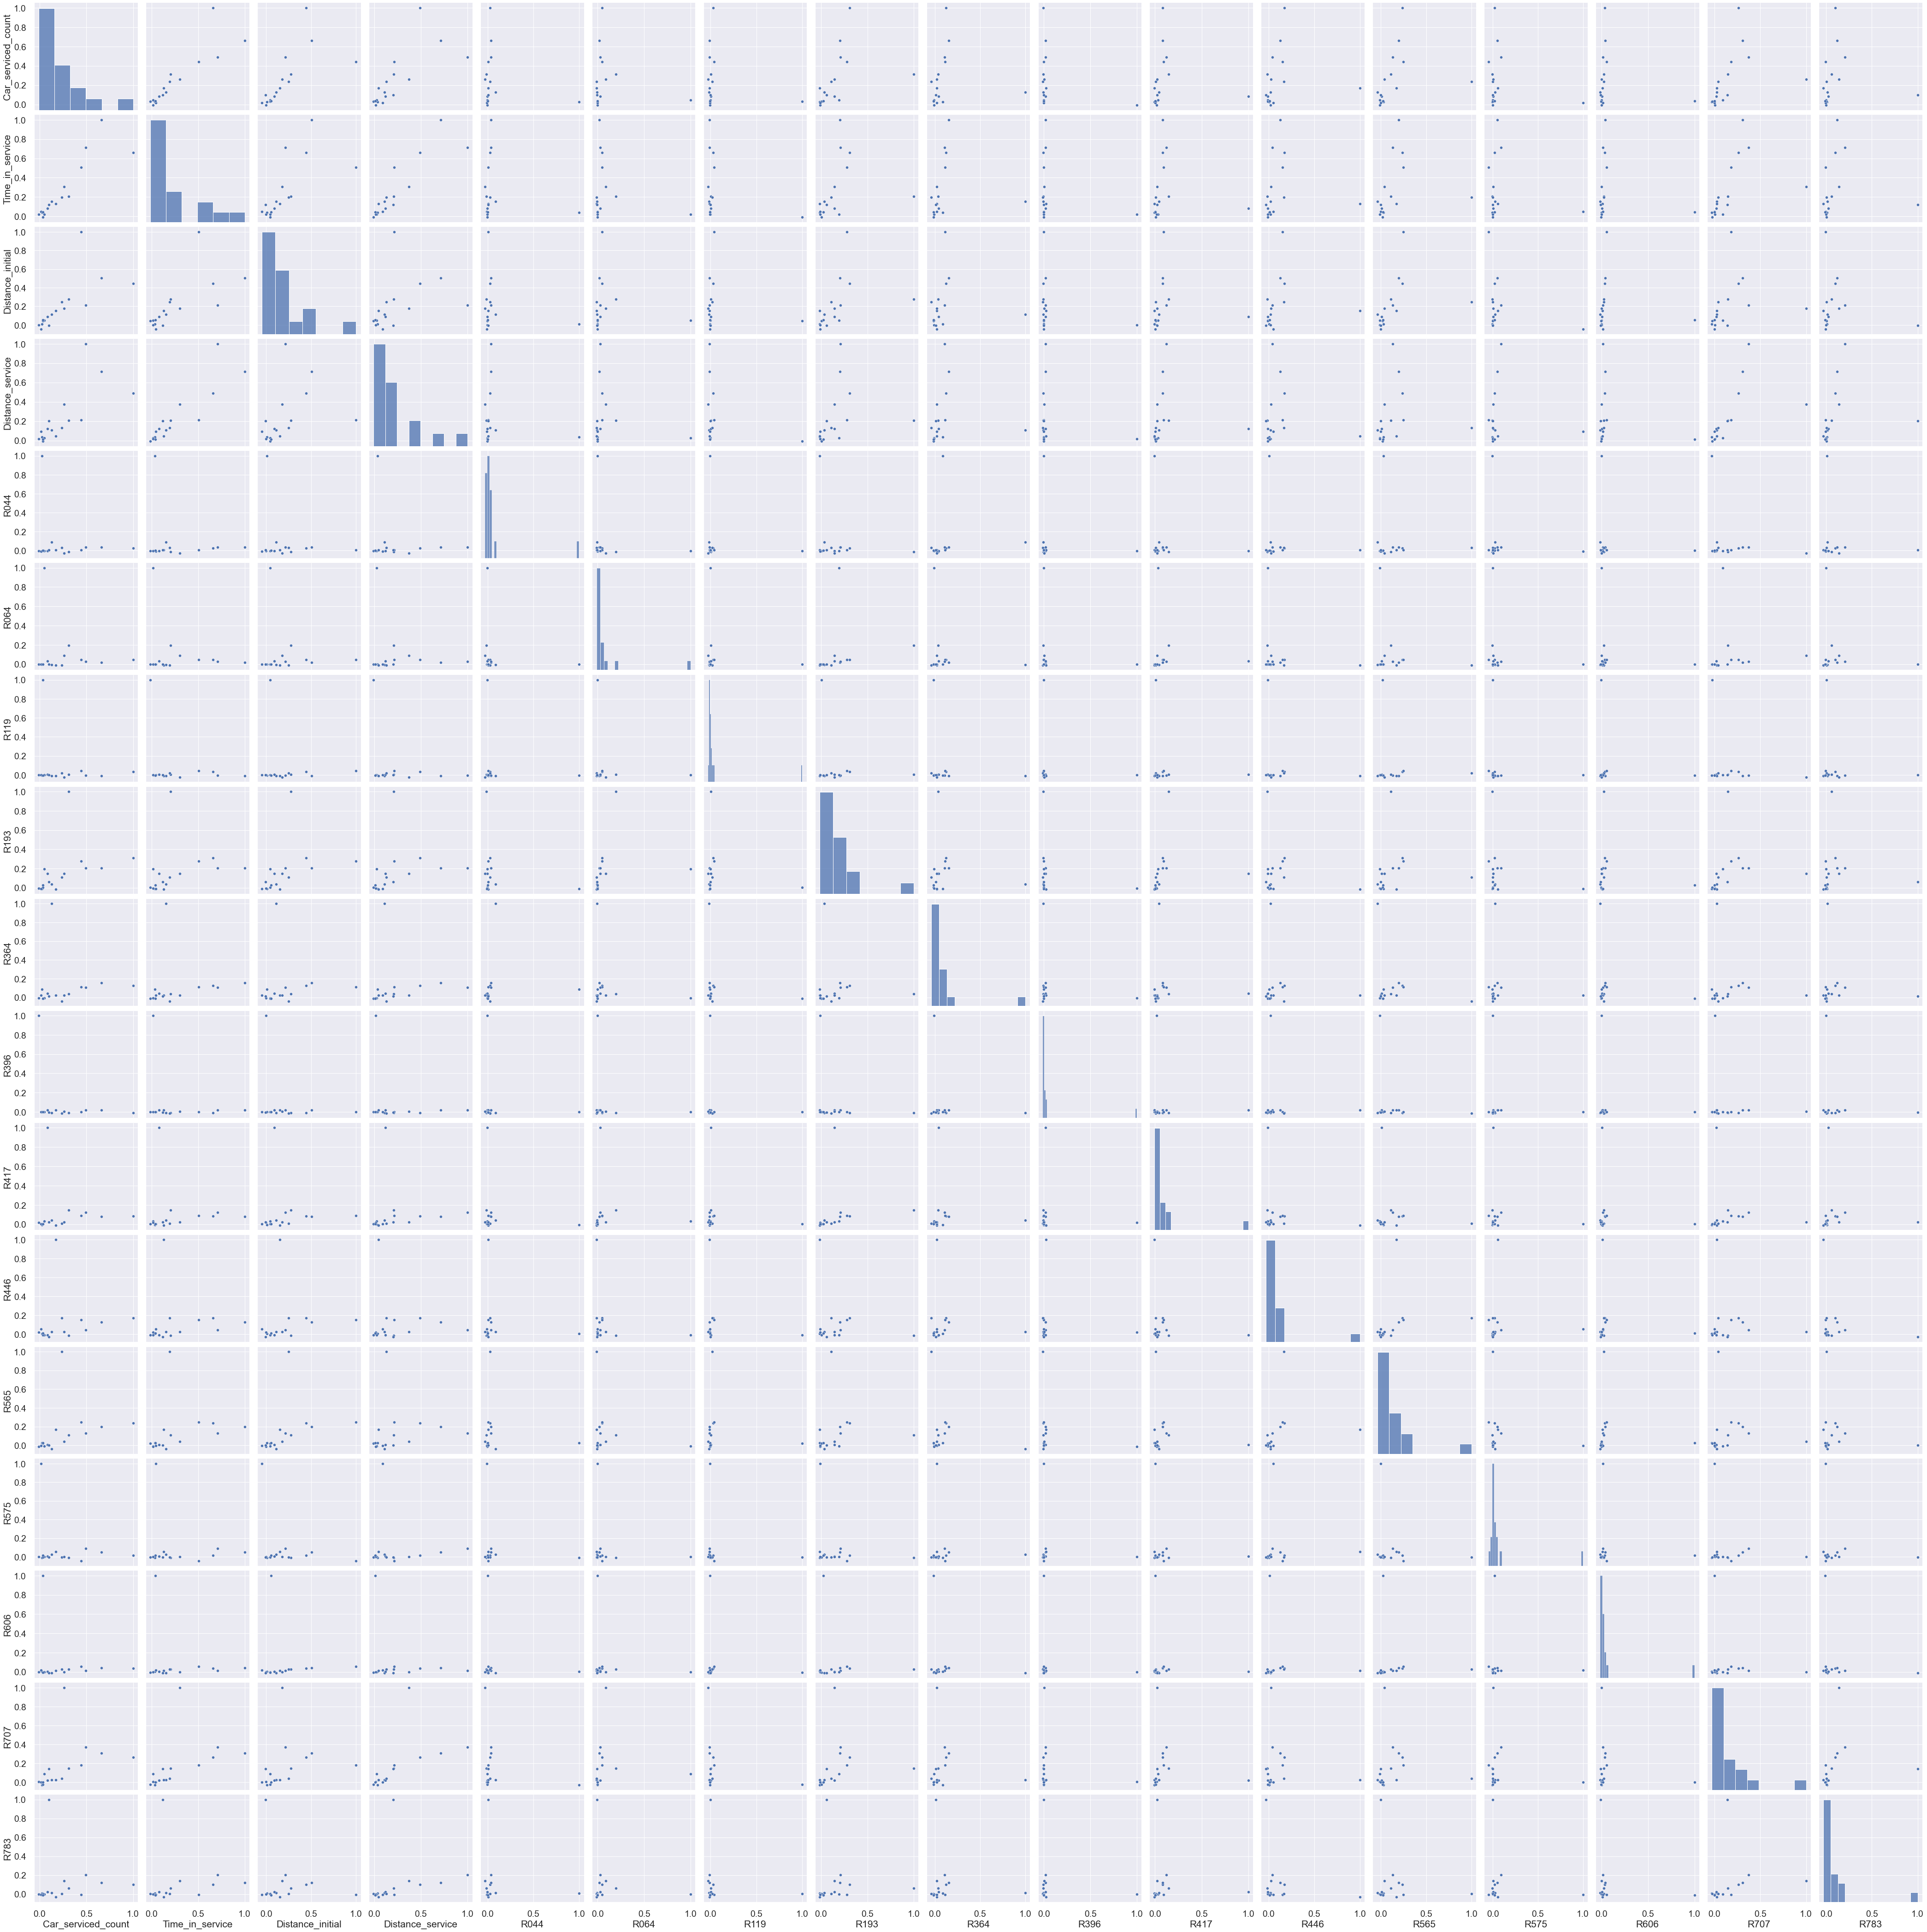

In [422]:
#Pairwise distribution: all variables
sns.set(font_scale=1.75)
sns.pairplot(Merged_data_new.corr(), height=3.5)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>As the number of variables is more, therefore visualizing the Pairwise distribution is unclear, instead we find Correlation coeffiecients
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            10.2  Correlation coeffiecients
            </span>   
        </font>    
</h3>

<AxesSubplot:>

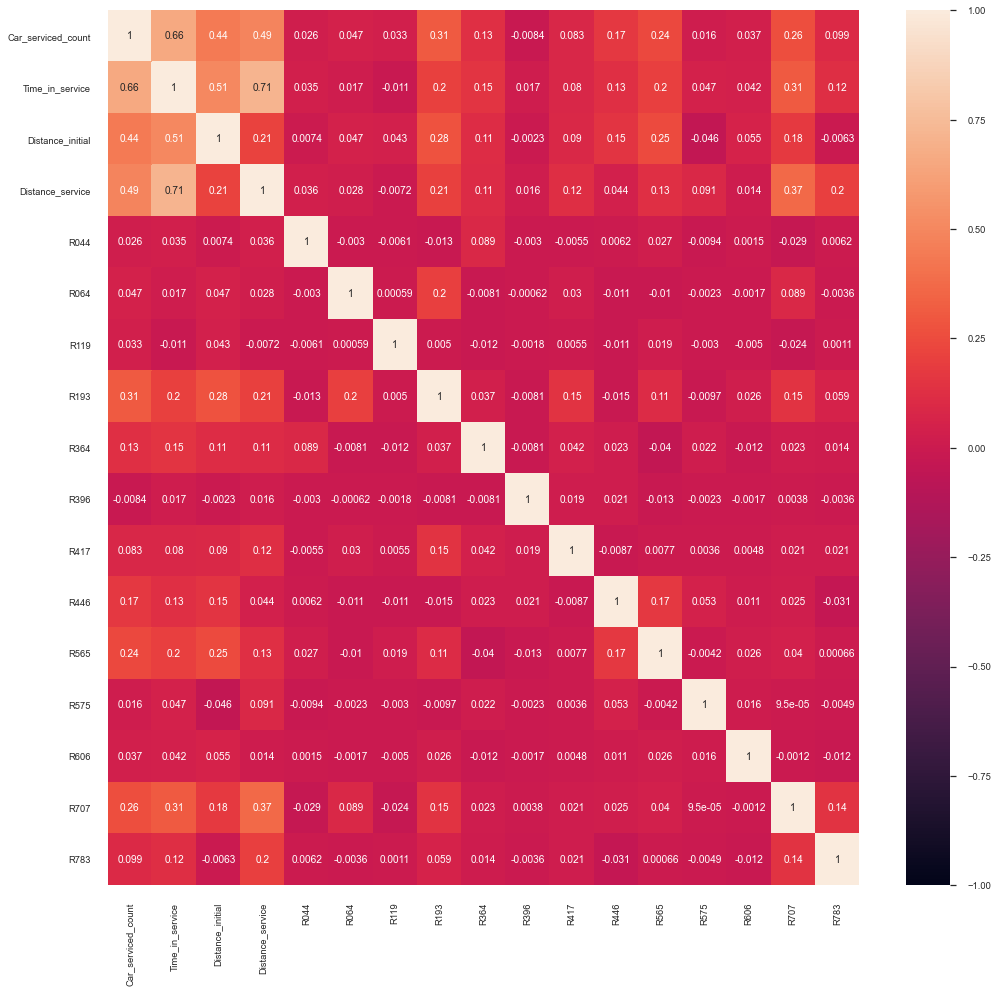

In [423]:
# Correlation coeffiecients using heat map: all variables 
plt.figure(figsize=(15,15))
sns.set(font_scale=0.85)
sns.heatmap(Merged_data_new.corr(), annot=True,vmin=-1,vmax=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Of the total 17 variables only 7 variables have better correlation, we will choose these 7 variables for further analysis - the 7 variables are listed below:
        <br>1. Time_in_service
        <br>2. Distance_service
        <br>3. Distance_initial
        <br>4. Car_serviced_count
        <br>5. R707
        <br>6. R565
        <br>7. R193      
        </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            10.3  Correlation coeffiecients for selected Variables
            </span>   
        </font>    
</h3>

<AxesSubplot:>

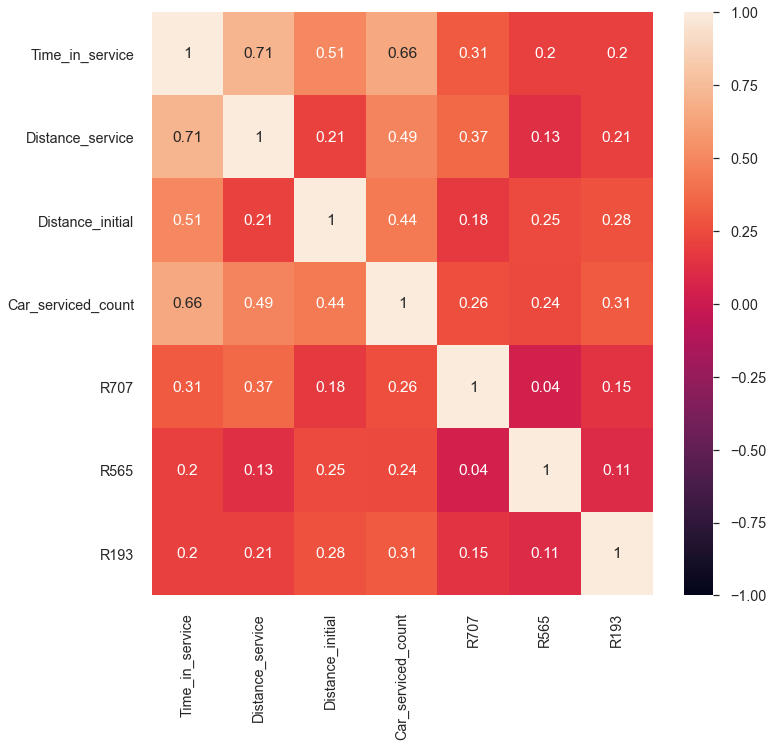

In [424]:
# Correlation coeffiecients using heat map 
plt.figure(figsize=(10,10))
sns.set(font_scale=1.3)
sns.heatmap(Merged_data_new[['Time_in_service','Distance_service','Distance_initial','Car_serviced_count','R707','R565','R193']].corr(), annot=True,vmin=-1,vmax=1)

<a id="clean1"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            10.3.1  Getting the top 10 correlations crosstab in Descending order
            </span>   
        </font>    
</h3>

In [425]:
# Getting the top 10 correlations in Descending order
Merged_data_SV = Merged_data_new[['Time_in_service','Distance_service','Distance_initial','Car_serviced_count','R707','R565','R193']] 
corr_Merged_data_SV = Merged_data_SV.corr()
corr_Merged_data_SV = corr_Merged_data_SV.where(np.triu(np.ones(corr_Merged_data_SV.shape),k=1).astype(np.bool))
corr_df_Merged_data_SV = corr_Merged_data_SV.unstack().reset_index()
corr_df_Merged_data_SV.columns =['VAR1','VAR2','Correlation']
corr_df_Merged_data_SV.dropna(subset = ["Correlation"], inplace = True)
corr_df_Merged_data_SV["Correlation"]=corr_df_Merged_data_SV["Correlation"].abs() 
corr_df_Merged_data_SV.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_Merged_data_SV.head(10)

,VAR1,VAR2,Correlation
7,Distance_service,Time_in_service,0.711173
21,Car_serviced_count,Time_in_service,0.661912
14,Distance_initial,Time_in_service,0.506518
22,Car_serviced_count,Distance_service,0.491060
23,Car_serviced_count,Distance_initial,0.442396
29,R707,Distance_service,0.373076
45,R193,Car_serviced_count,0.310801
28,R707,Time_in_service,0.305615
44,R193,Distance_initial,0.277385
31,R707,Car_serviced_count,0.262212


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> From the Correlation coefficient crosstab, the following are the observation:
        <br>1. Distance_service -   Distance_service is positively highly correlated with Time_in_service, Car_serviced_count and R707 
        <br>2. Time_in_service - Time_in_service is positively highly correlated with Distance_service, Car_serviced_count, Distance_initial and R707
        <br>3. Car_serviced_count - Car_serviced_count is positively highly correlated with Time_in_service, Distance_service, Distance_initial and R193<br>
        <b>It is evident that no two service maintenance Reasons have any strong correlation </b><br> 
        <br>
        <br>      
        </span>    
</div>

<a id="bins"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            11.  Merging the Predicted variable - Failure_bin
            </span>   
        </font>    
</h2>

In [426]:
## Left join: maintenance_failure_new & Merged_data_new
Predictive_maintenance_df = maintenance_failure_new.merge(Merged_data_new, on='Asset', how='left')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Predictive_maintenance_df will be our final dataset containing all variables including the predicted variable
    </span>    
</div>

In [427]:
Predictive_maintenance_df.head()

,Asset,failure_bin,Car_serviced_count,Time_in_service,Distance_initial,Distance_service,R044,R064,R119,R193,R364,R396,R417,R446,R565,R575,R606,R707,R783
0,A003146,0.0,3,357.125,25836.172992,230.782801,0,0,0,29,1,0,0,0,0,0,0,0,0
1,A046288,0.0,12,637.000,26654.853826,2548.530678,0,0,0,9,14,0,0,9,0,0,0,2369,0
2,A115725,1.0,10,594.000,31508.878427,1604.100935,0,0,0,49,4,0,0,7,94,0,0,194,0
3,A187055,0.0,17,617.000,26275.564773,1994.476899,0,0,0,47,19,0,0,5,174,4,0,388,0
4,A260381,0.0,9,583.000,30958.325778,2314.538508,7,0,0,26,9,0,0,0,21,0,0,614,2


In [428]:
Predictive_maintenance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Asset               1624 non-null   object 
 1   failure_bin         1624 non-null   float64
 2   Car_serviced_count  1624 non-null   int64  
 3   Time_in_service     1624 non-null   float64
 4   Distance_initial    1624 non-null   float64
 5   Distance_service    1624 non-null   float64
 6   R044                1624 non-null   int64  
 7   R064                1624 non-null   int64  
 8   R119                1624 non-null   int64  
 9   R193                1624 non-null   int64  
 10  R364                1624 non-null   int64  
 11  R396                1624 non-null   int64  
 12  R417                1624 non-null   int64  
 13  R446                1624 non-null   int64  
 14  R565                1624 non-null   int64  
 15  R575                1624 non-null   int64  
 16  R606  

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Predictive_maintenance_df dataset has no null variables
    </span>    
</div>

In [429]:
Predictive_maintenance_df.describe(include="all")

,Asset,failure_bin,Car_serviced_count,Time_in_service,Distance_initial,Distance_service,R044,R064,R119,R193,R364,R396,R417,R446,R565,R575,R606,R707,R783
count,1624,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000
unique,1624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A095743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.245690,11.660099,575.027171,28949.501756,1741.496382,0.450123,0.048645,4.486453,52.710591,9.955049,0.059729,26.297414,11.943966,128.641626,0.361453,0.611453,282.691502,2.342980
std,NaN,0.430628,4.883257,110.881423,2301.855891,662.969717,3.760380,1.960352,63.320035,85.097508,27.533430,2.407015,113.214510,27.543881,240.688529,3.854151,8.700317,277.462892,9.149675
min,NaN,0.000000,1.000000,357.125000,25740.475447,160.760206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,9.000000,544.000000,26918.022077,1435.025545,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,146.000000,0.000000
50%,NaN,0.000000,12.000000,607.000000,28691.490162,1799.726558,0.000000,0.000000,0.000000,25.000000,2.000000,0.000000,0.000000,3.000000,88.500000,0.000000,0.000000,225.000000,0.000000
75%,NaN,0.000000,15.000000,655.250000,30866.202302,2232.189019,0.000000,0.000000,0.000000,65.000000,8.000000,0.000000,0.000000,13.000000,173.250000,0.000000,0.000000,392.000000,1.000000


<a id="predictive"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            12. Data Analysis with Predictive_maintenance_df dataframe
            </span>   
        </font>    
</h2>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            12.1  Imbalance Analysis
            </span>   
        </font>    
</h3>

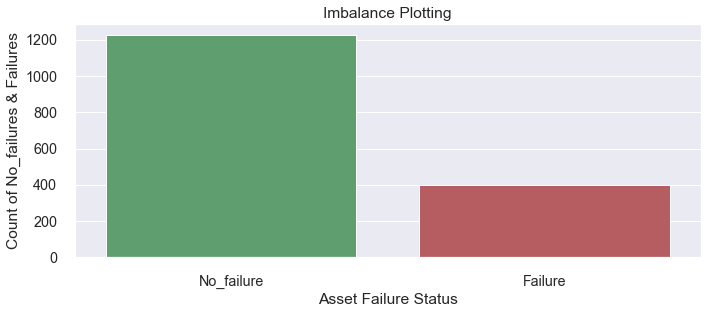

In [430]:
# Finding the No_failure which is 0 and Failures which is 1 records proportion in the predicted variable
Imbalance = Predictive_maintenance_df["failure_bin"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['No_failure','Failure']
sns.barplot(x,"failure_bin",data = Imbalance,palette= ['g','r'])
plt.xlabel("Asset Failure Status")
plt.ylabel("Count of No_failures & Failures")
plt.title("Imbalance Plotting")
plt.show()

In [431]:
count_0 = Imbalance.iloc[0]["failure_bin"]
count_1 = Imbalance.iloc[1]["failure_bin"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to No_failures and Failures datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to No_failures and Failures datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to No_failures and Failures datas are: 75.43 and 24.57
Ratios of imbalance in relative with respect to No_failures and Failures datas is 3.07 : 1 (approx)


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Ratios of imbalance in percentage & relative with respect to No_failures and Failures datas:
        <br>1. Ratios of imbalance in percentage with respect to No_failures and Failures datas are: 75.43 and 24.57
        <br>2. Ratios of imbalance in relative with respect to No_failures and Failures datas is 3.07 : 1 (approx)
        <br>
        <br>      
        </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            12.2  Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
            </span>   
        </font>    
</h3>

In [432]:
# All columns in Predictive_maintenance_df dataframe
Predictive_maintenance_df.columns

Index(['Asset', 'failure_bin', 'Car_serviced_count', 'Time_in_service', 'Distance_initial', 'Distance_service', 'R044', 'R064', 'R119', 'R193', 'R364', 'R396', 'R417', 'R446', 'R565', 'R575', 'R606', 'R707', 'R783'], dtype='object')

In [433]:
# Bifurcating the Predictive_maintenance_df dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['Car_serviced_count','Time_in_service', 'Distance_initial', 'Distance_service', 
                        'R044', 'R064', 'R119', 'R193', 'R364', 'R396', 'R417', 'R446', 'R565', 'R575', 'R606', 'R707', 'R783']


No_failures_df = Predictive_maintenance_df.loc[Predictive_maintenance_df['failure_bin']==0, cols_for_correlation] # No_failures
Failures_df = Predictive_maintenance_df.loc[Predictive_maintenance_df['failure_bin']==1, cols_for_correlation] # Failures

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            12.3  Correlation between numeric variable: Predictive_maintenance_df
            </span>   
        </font>    
</h3>

<a id="clean1"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            12.3.1  Getting the top 10 correlation for the No_failures data
            </span>   
        </font>    
</h3>

In [434]:
# Getting the top 10 correlation for the No_failures data
corr_No_failures = No_failures_df.corr()
corr_No_failures = corr_No_failures.where(np.triu(np.ones(corr_No_failures.shape),k=1).astype(np.bool))
corr_df_No_failures = corr_No_failures.unstack().reset_index()
corr_df_No_failures.columns =['VAR1','VAR2','Correlation']
corr_df_No_failures.dropna(subset = ["Correlation"], inplace = True)
corr_df_No_failures["Correlation"]=corr_df_No_failures["Correlation"].abs() 
corr_df_No_failures.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_No_failures.head(10)

,VAR1,VAR2,Correlation
52,Distance_service,Time_in_service,0.705295
17,Time_in_service,Car_serviced_count,0.663571
51,Distance_service,Car_serviced_count,0.493200
35,Distance_initial,Time_in_service,0.489487
34,Distance_initial,Car_serviced_count,0.448129
258,R707,Distance_service,0.418626
256,R707,Time_in_service,0.378142
119,R193,Car_serviced_count,0.312911
255,R707,Car_serviced_count,0.312781
206,R565,Distance_initial,0.279510


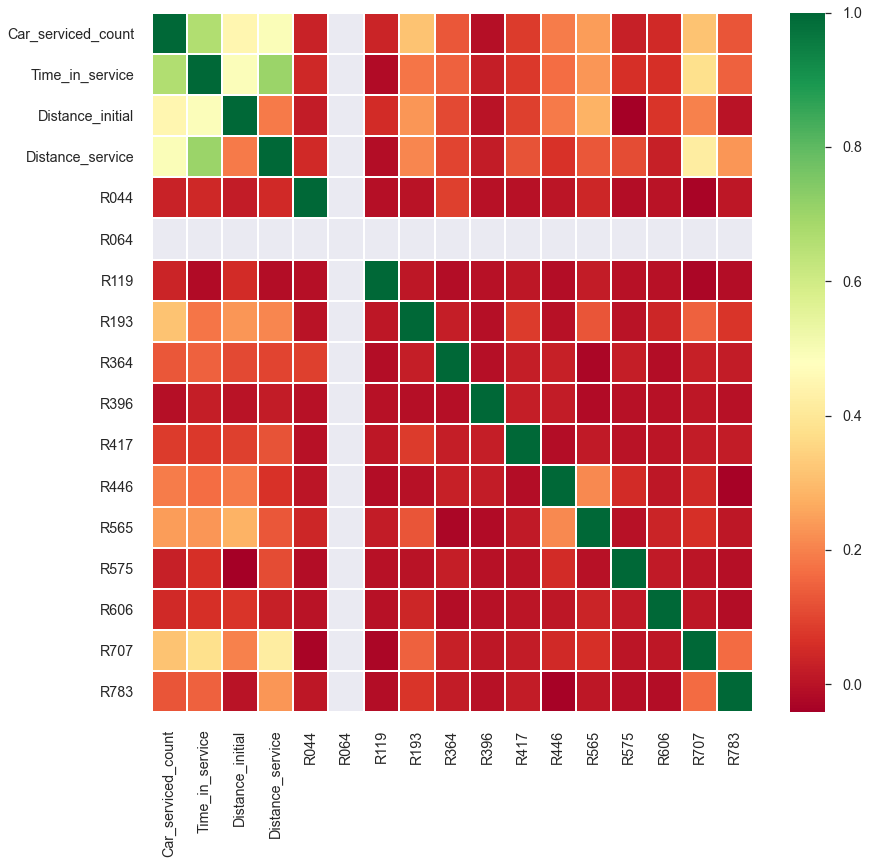

In [435]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(No_failures_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Correlating factors amongst No_failures Assets:
        <br>1. Distance_service -   Distance_service is positively highly correlated with Time_in_service, Car_serviced_count and R707 
        <br>2. Time_in_service - Time_in_service is positively highly correlated with Distance_service, Car_serviced_count, Distance_initial and R707
        <br>3. Car_serviced_count - Car_serviced_count is positively highly correlated with Time_in_service, Distance_service, Distance_initial, R193 and R707 <br>
        <b>It is evident that no two service maintenance Reasons have any strong correlation </b><br> 
        </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.0" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            12.3.2  Getting the top 10 correlation for the failures data
            </span>   
        </font>    
</h3>

In [436]:
# Getting the top 10 correlation for the failures data
corr_Failures = Failures_df.corr()
corr_Failures = corr_Failures.where(np.triu(np.ones(corr_Failures.shape),k=1).astype(np.bool))
corr_df_Failures = corr_Failures.unstack().reset_index()
corr_df_Failures.columns =['VAR1','VAR2','Correlation']
corr_df_Failures.dropna(subset = ["Correlation"], inplace = True)
corr_df_Failures["Correlation"]=corr_df_Failures["Correlation"].abs() 
corr_df_Failures.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_Failures.head(10)

,VAR1,VAR2,Correlation
52,Distance_service,Time_in_service,0.656552
17,Time_in_service,Car_serviced_count,0.568618
35,Distance_initial,Time_in_service,0.421620
51,Distance_service,Car_serviced_count,0.377939
124,R193,R064,0.348526
177,R417,R193,0.305929
34,Distance_initial,Car_serviced_count,0.303663
121,R193,Distance_initial,0.283407
258,R707,Distance_service,0.276655
187,R446,Car_serviced_count,0.247585


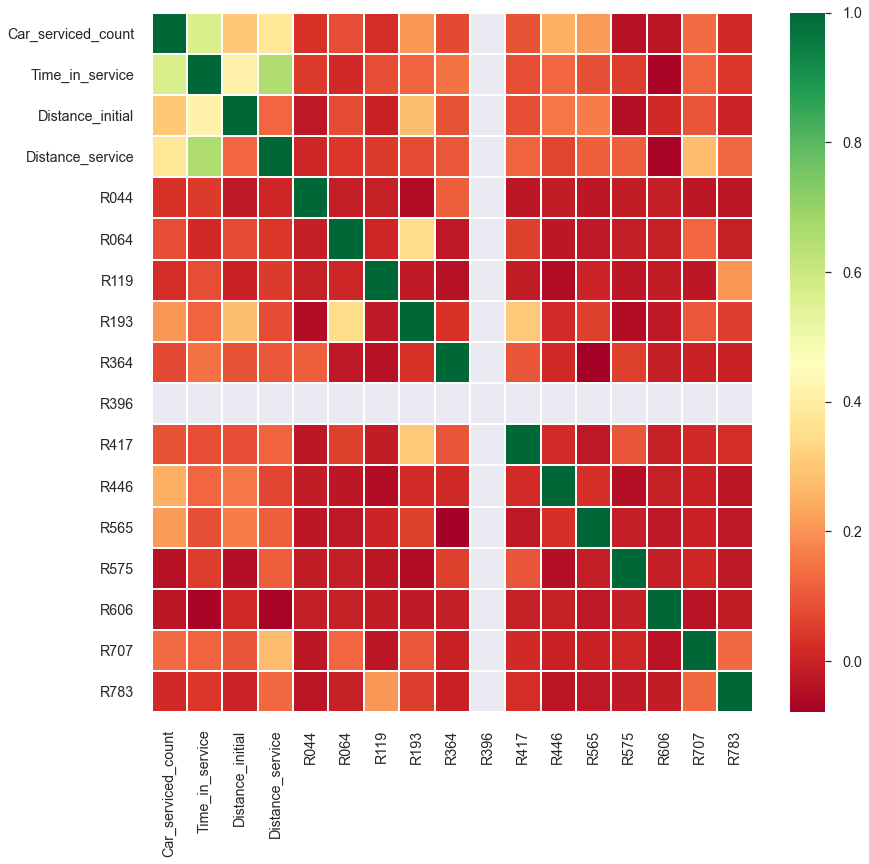

In [437]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Failures_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Correlating factors amongst failures Assets:
        <br>1. Distance_service -   Distance_service is positively highly correlated with Time_in_service and Car_serviced_count and R707 
        <br>2. Time_in_service - Time_in_service is positively highly correlated with Distance_service, Car_serviced_count and Distance_initial
        <br>3. Car_serviced_count - Car_serviced_count is positively highly correlated with Time_in_service, Distance_service, Distance_initial and R446 
        <br>4. Reason R193 - R193 is positively correlated R064 and R417<br>
        <br>
        <br>      
        </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            12.4  Numerical Univariate Analysis
            </span>   
        </font>    
</h3>

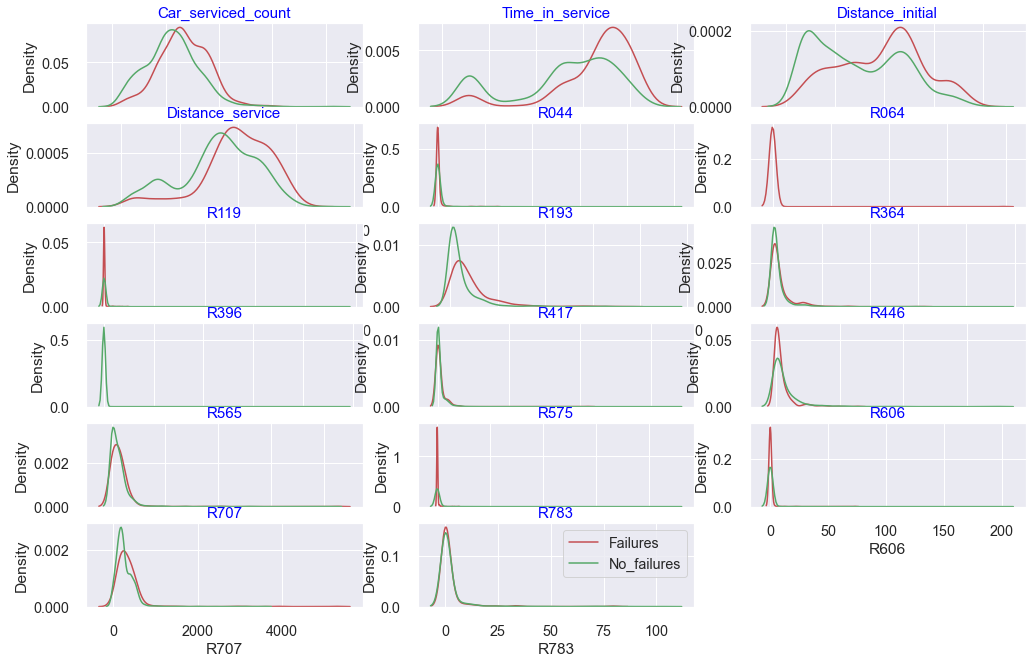

In [468]:
# Plotting the distribution plot to see density for Failures and No_failures classes
amount = Predictive_maintenance_df[['Car_serviced_count','Time_in_service', 'Distance_initial', 'Distance_service', 
                        'R044', 'R064', 'R119', 'R193', 'R364', 'R396', 'R417', 'R446', 'R565', 'R575', 'R606', 'R707', 'R783']]

fig = plt.figure(figsize=(15,10))

for i in enumerate(amount):
    plt.subplot(6,3,i[0]+1)
    sns.distplot(Failures_df[i[1]], hist=False, color='r',label ="Failures")
    sns.distplot(No_failures_df[i[1]], hist=False, color='g', label ="No_failures")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> We notice the following:
        <br>1. Higher values of the Failure assets for 'Car_serviced_count','Time_in_service', 'Distance_initial' and 'Distance_service', 
        <br>2. For majority of the reasons Failure assets have higher values 
        <br>3. For R565 there is no Assest Failure 
        <br>
        <br>      
        </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            12.5  Grouping by Assest Failure and No_failure
            </span>   
        </font>    
</h3>

In [439]:
# Grouping by Assest Failure and No_failure 
Predictive_maintenance_df_groups = Predictive_maintenance_df.groupby('failure_bin', as_index=False).agg(
    Time_in_service=('Time_in_service', 'mean'),
    Distance_initial=('Distance_initial', 'mean'),
    Car_serviced_count=('Car_serviced_count', 'mean'),
    Distance_service=('Distance_service', 'mean'),
    R707=('R707', 'mean'),
    R565=('R565', 'mean'),
    R193=('R193', 'mean'),
    R044=('R044', 'mean'),
    R064=('R064', 'mean'),
    R119=('R119', 'mean'),
    R364=('R364', 'mean'),
    R396=('R396', 'mean'),
    R417=('R417', 'mean'),
    R446=('R446', 'mean'),
    R575=('R575', 'mean'),
    R606=('R606', 'mean'),
    R783=('R783', 'mean'),
    
)
Predictive_maintenance_df_groups

,failure_bin,Time_in_service,Distance_initial,Car_serviced_count,Distance_service,R707,R565,R193,R044,R064,R119,R364,R396,R417,R446,R575,R606,R783
0,0.0,557.833367,28653.69380,11.101224,1661.419907,264.217143,123.800000,43.667755,0.506939,0.000000,4.756735,9.074286,0.079184,25.407347,13.331429,0.440816,0.702041,2.484898
1,1.0,627.815163,29857.68408,13.375940,1987.345212,339.411028,143.506266,80.473684,0.275689,0.197995,3.656642,12.659148,0.000000,29.030075,7.684211,0.117794,0.333333,1.907268


In [440]:
# Finding percentage between Assest Failure and No_failure class
Predictive_maintenance_df_groups_percentage = Predictive_maintenance_df_groups.apply(lambda x:100 * x / float(x.sum()))
Predictive_maintenance_df_groups_percentage

,failure_bin,Time_in_service,Distance_initial,Car_serviced_count,Distance_service,R707,R565,R193,R044,R064,R119,R364,R396,R417,R446,R575,R606,R783
0,0.0,47.048797,48.971149,45.353393,45.533759,43.771506,46.313916,35.175809,64.773913,0.0,56.537762,41.752656,100.0,46.672575,63.435751,78.91296,67.805519,56.575682
1,100.0,52.951203,51.028851,54.646607,54.466241,56.228494,53.686084,64.824191,35.226087,100.0,43.462238,58.247344,0.0,53.327425,36.564249,21.08704,32.194481,43.424318


<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            12.5  Top features causing Assest Failure
            </span>   
        </font>    
</h3>

In [441]:
# Sorting to find the top features
Predictive_maintenance_df_groups_percentage.round(2).sort_values(by=1,ascending = False,axis=1)

,failure_bin,R064,R193,R364,R707,Car_serviced_count,Distance_service,R565,R417,Time_in_service,Distance_initial,R119,R783,R446,R044,R606,R575,R396
0,0.0,0.0,35.18,41.75,43.77,45.35,45.53,46.31,46.67,47.05,48.97,56.54,56.58,63.44,64.77,67.81,78.91,100.0
1,100.0,100.0,64.82,58.25,56.23,54.65,54.47,53.69,53.33,52.95,51.03,43.46,43.42,36.56,35.23,32.19,21.09,0.0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Top features for the cause of Assest Failure:
        <br>1. The top features causing the Assest failure are : R064, R193,R364,R707,Car_serviced_count,Distance_service,R565,	R417,Time_in_service and Distance_initial 
        <br>2. Reason R064 is the only reason that is realted to only failure Assests 
        <br>3. These top features contribute to more than 50% for failure of an Assest
        <br>
        <br>      
        </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font size="4.5" color = MediumSeaGreen >
            <span style='font-family:Georgia'>
            12.5  Preventive measure for Assest failures
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Approach:Preventive measure for Assest failures </b> 
        <ul>
            <li> Based on the Top features causing Assest Failure: we would like to know the top 3 parts by quantity that are related to the maintenance service reasons</li>
            </ul>  
</div>

In [442]:
# Fixing the failure assests
cols_for_correlation = ['Asset']
Failures_df_Assets = Predictive_maintenance_df.loc[Predictive_maintenance_df['failure_bin']==1, cols_for_correlation] # Failures

In [443]:
Failures_df_Assets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 2 to 1618
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Asset   399 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [311]:
## Left join: Failures_df_Assets & maintenance_part_consumption
Failures_parts = Failures_df_Assets.merge(maintenance_part_consumption, on='Asset', how='left')

In [447]:
Failures_parts.describe(include="all")

,Asset,Reason,Part,Quantity,Quantity_categories
count,68071,68071,68071,68071.000000,66931
unique,399,13,1957,NaN,2
top,A337108,R707,P566684,NaN,Low
freq,344,33288,5749,NaN,47279
mean,NaN,NaN,NaN,3.629769,NaN
std,NaN,NaN,NaN,24.449001,NaN
min,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,2.000000,NaN


In [451]:
# Creating Pivot table to bring the parts to the columns
Failures_parts_pivottable= pd.pivot_table(Failures_parts, values='Quantity', index=['Reason'],
                    columns=['Part'], aggfunc=np.sum,fill_value=0)


In [455]:
Failures_parts_pivottable.head()

Part,P000342,P000666,P002198,P003055,P003497,P003500,P003739,P004729,P005117,P005984,P006127,P006356,P006918,P007109,P007736,P008384,P008845,P008881,P009827,P009878,P010426,P010558,P010627,P011108,P012093,P012229,P012452,P012500,P012504,P012656,P013029,P013154,P013738,P013883,P014307,P014833,P015626,P015651,P015686,P015803,P016050,P016401,P017031,P017593,P018389,P018573,P019689,P019726,P019732,P020123,P020879,P021137,P021587,P021790,P022037,P022165,P022279,P022606,P022633,P023573,P023890,P024529,P024715,P025051,P026358,P026652,P027629,P027991,P028488,P028697,P029089,P029158,P030604,P031042,P031861,P032162,P032165,P032227,P032558,P033084,P033210,P033287,P033555,P033967,P034602,P034735,P035184,P037247,P037714,P038306,P040316,P040338,P040503,P041100,P041208,P042094,P044261,P044718,P046042,P046527,P046568,P047285,P047397,P047997,P048016,P048229,P049962,P050041,P051019,P051624,P052646,P054050,P054682,P054714,P055163,P055306,P055646,P055675,P055754,P056180,P056595,P057202,P057426,P057464,P057931,P058078,P058864,P058896,P059346,P061503,P062311,P062328,P062385,P063146,P063882,P065335,P066368,P066765,P067401,P068728,P070081,P071455,P073682,P073996,P074144,P074145,P074517,P074792,P074904,P075087,P076115,P076279,P076398,P076882,P077501,P078477,P078561,P078787,P078818,P079223,P079973,P080596,P080841,P080850,P082032,P082767,P082886,P083033,P083410,P084253,P085348,P085740,P087424,P087606,P087760,P087769,P087931,P090276,P090554,P092029,P093096,P093294,P093392,P093948,P094079,P094778,P094956,P095144,P095755,P096092,P096356,P096555,P096596,P096686,P096726,P096951,P097048,P097353,P097840,P097871,P099004,P099095,P099573,P099971,P100208,P101258,P101351,P101612,P101856,P101898,P102117,P102250,P102391,P102475,P104786,P108373,P108705,P108949,P109154,P109389,P110761,P110989,P111685,P112777,P113914,P115401,P116057,P116338,P117970,P118353,P118466,P118530,P118712,P119454,P120417,P120882,P121169,P122093,P122388,P122452,P123067,P124285,P124699,P125296,P125506,P125807,P126129,P126452,P126879,P128575,...,P876824,P877415,P878809,P879120,P879502,P880002,P881494,P881942,P882112,P882593,P882728,P883714,P884158,P884311,P884489,P885034,P885376,P885473,P887474,P889045,P889616,P890038,P890601,P891505,P891938,P892051,P892245,P892276,P892629,P892808,P892923,P892965,P892977,P893071,P893186,P893295,P893387,P893461,P893852,P893921,P893931,P894931,P895502,P896332,P896942,P897323,P897539,P897979,P898720,P898926,P900358,P901081,P901384,P901721,P901860,P902154,P902743,P902792,P903706,P905147,P905783,P907622,P908066,P908125,P908499,P909619,P910229,P910417,P910463,P910604,P910616,P912026,P912211,P912467,P912690,P913600,P914031,P914460,P915387,P915807,P916223,P917411,P917868,P917979,P918273,P918944,P919699,P919935,P920258,P921701,P922132,P922218,P922251,P923088,P924984,P925921,P926717,P927470,P927673,P927778,P928452,P928935,P929013,P929805,P930304,P930395,P930498,P930600,P930836,P933910,P933941,P933985,P934022,P934403,P936141,P936429,P936839,P936962,P937261,P937562,P937889,P938706,P938728,P938789,P938829,P939499,P940088,P941614,P941907,P942113,P943084,P943290,P943444,P943515,P943720,P943802,P944012,P944789,P945270,P946188,P946191,P946975,P947398,P948718,P948794,P949729,P949982,P950642,P950723,P951121,P953188,P953340,P953346,P953371,P953658,P956438,P956517,P956645,P957013,P958449,P958490,P958918,P959003,P959532,P959866,P961494,P961757,P962216,P962924,P963029,P963204,P963466,P963715,P964598,P965352,P966598,P967134,P967368,P967540,P967634,P968050,P968710,P969669,P969670,P969767,P969780,P970739,P971200,P972212,P972393,P972418,P972791,P972871,P973700,P974388,P974777,P975656,P975830,P976116,P977141,P977544,P977801,P977977,P978694,P979428,P979959,P980311,P981539,P982020,P982123,P982563,P982984,P983854,P984291,P984904,P985635,P986188,P986373,P986596,P986611,P986698,P986861,P987233,P987585,P987809,P990067,P990089,P990329,P991037,P991119,P991287,P991359,P991710,P991825,P992240,P993102,P993510,P993889,P993914,P994850,P995317,P996683,P997022,P997691,P998342,P999180,P999259,P999363,P999516

In [463]:
# Top 3 parts by quantity for every reason
Failures_parts_pivottable_top =pd.DataFrame(Failures_parts_pivottable.apply(lambda x:list(Failures_parts_pivottable.columns[np.array(x).argsort()[::-1][:3]]), axis=1).to_list(),  
                                                 index=Failures_parts_pivottable.index, columns=['Top1', 'Top2', 'Top3'])


In [470]:
Failures_parts_pivottable_top.loc[['R064','R193','R364','R707','R565']]

,Top1,Top2,Top3
Reason,,,
R064,P524837,P274715,P239078
R193,P008845,P953340,P628779
R364,P026652,P953340,P738107
R707,P153152,P628779,P524837
R565,P153152,P026652,P628779


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> Preventive measure for Assest failures:
        <br>1. For top service maintenance reasons causing the Assest failure: the above table provides the top 3 parts by quantity that are replaced in the Assest that had a failure  
        <br>2. Regular servicing of Assests particularly checking the top parts can allow us to reduce failures/downtime 
        <br>3. The Car Rental Company should always keep the top parts in stock as these are the most used for more number of Assest failures
        <br>
        <br>      
        </span>    
</div>

<a id="conclusion"></a>
<h2>   
      <font size="5" color = black >
            <span style='font-family:Georgia'>
            13. Conclusions
            </span>   
        </font>    
</h2>

<h3 >   
      <font size="3" color = black >
            <span style='font-weight: normal'>
                <span style='font-family:Georgia'>
               What are the causes of the failures? was the business problem<br>
             <br>The following provides you with the top ranked features that contributes more towards the cause for Asset Failure<br>
        <br>1.R064 - Powertrain Control Module (PCM) failure 
        <br>2. R193 - Fuel Rail Pressure Sensor Circuit High Input
        <br>3. R364 - Fuel Pump
        <br>4. R707 - Transmission Range Sensor Circuit Low Input
        <br>5. Distance_service - Higher the distance travelled by an Asset between 2 services,the higher the chances of failure
        <br>6. R565 - Engine - Canister Purge Solenoid Circuit Fault
        <br>7. R417 - Air conditioning
        <br>8. Time_in_service - The Higher the time the more is the chances for failure
        <br>9. Distance_initial - The more the distance travelled by the Assest, the higher the chances of failure
        <br>
        <br>Regular maintence of the Assets and availability of all the parts related to the top features causing failures can allow the car rental companies to reduce the Assets downtime <br>
            </span>   
        </font>    
</h3>